# Breast cancer by K mean Clustering

### Based on the given features we need to form groups using Kmean

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the dataset
data = pd.read_csv('data.csv')

In [3]:
pd.set_option('display.max_columns', None)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### Domain Analysis

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

1) ID number
2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

a) radius  : (mean of distances from center to points on the perimeter)
b) texture : (standard deviation of gray-scale values)
c) perimeter :
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry :
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

Data:

id  : ID number

diagnosis : The diagnosis of breast tissues (M = malignant, B = benign)

radius_mean : mean of distances from center to points on the perimeter

texture_mean : standard deviation of gray-scale values

perimeter_mean : mean size of the core tumor

area_mean

smoothness_mean : mean of local variation in radius lengths

compactness_mean: mean of perimeter^2 / area - 1.0

concavity_mean: mean of severity of concave portions of the contour

concave points_mean: mean for number of concave portions of the contour

symmetry_mean

fractal_dimension_mean: mean for "coastline approximation" - 1

radius_se: standard error for the mean of distances from center to points on the perimeter

texture_se: standard error for standard deviation of gray-scale values

perimeter_se

area_se

smoothness_se :standard error for local variation in radius lengths

compactness_se :standard error for perimeter^2 / area - 1.0

concavity_se :standard error for severity of concave portions of the contour

concave points_se :standard error for number of concave portions of the contour

symmetry_se

fractal_dimension_se :standard error for "coastline approximation" - 1

radius_worst :"worst" or largest mean value for mean of distances from center to points on the perimeter

texture_worst: "worst" or largest mean value for standard deviation of gray-scale values

perimeter_worst

area_worst

smoothness_worst :  "worst" or largest mean value for local variation in radius lengths

compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0

concavity_worst: "worst" or largest mean value for severity of concave portions of the contour

concave points_worst: "worst" or largest mean value for number of concave portions of the contour

symmetry_worst

fractal_dimension_worst:"worst" or largest mean value for "coastline approximation" - 1

Label	Count
8670.00 - 911398

### Basic Checks

In [4]:
# checking the first 5 rows of our dataset
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [6]:
data.groupby(['diagnosis']).perimeter_mean.mean()

diagnosis
B     78.075406
M    115.365377
Name: perimeter_mean, dtype: float64

In [7]:
data.groupby('diagnosis')['concavity_mean'].mean()

diagnosis
B    0.046058
M    0.160775
Name: concavity_mean, dtype: float64

In [8]:
data.groupby('diagnosis')['symmetry_mean'].describe()

,count,mean,std,min,25%,50%,75%,max
diagnosis,,,,,,,,
B,357.0,0.174186,0.024807,0.1060,0.15800,0.1714,0.18900,0.2743
M,212.0,0.192909,0.027638,0.1308,0.17405,0.1899,0.20985,0.3040


In [9]:
data.select_dtypes(int)

,id
0,842302
1,842517
2,84300903
3,84348301
4,84358402
...,...
564,926424
565,926682
566,926954
567,927241


In [10]:
data.select_dtypes(float)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [11]:
data.select_dtypes(include=object)

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [12]:
data.loc[5:10,'fractal_dimension_worst']

5     0.12440
6     0.08368
7     0.11510
8     0.10720
9     0.20750
10    0.08452
Name: fractal_dimension_worst, dtype: float64

In [13]:
data.iloc[5:10,1]

5    M
6    M
7    M
8    M
9    M
Name: diagnosis, dtype: object

In [14]:
data.sort_values('id')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
131,8670,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,0.4743,0.7859,3.0940,48.31,0.006240,0.01484,0.02813,0.010930,0.01397,0.002461,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019,NaN
287,8913,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,0.1532,0.4690,1.1150,12.68,0.004731,0.01345,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,NaN
291,8915,B,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,0.05852,0.2877,0.9480,2.1710,24.87,0.005332,0.02115,0.01536,0.011870,0.01522,0.002815,16.25,26.19,109.10,809.8,0.13130,0.3030,0.1804,0.14890,0.2962,0.08472,NaN
403,9047,B,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,0.06200,0.1458,0.9050,0.9975,11.36,0.002887,0.01285,0.01613,0.007308,0.01870,0.001972,13.86,23.02,89.69,580.9,0.11720,0.1958,0.1810,0.08388,0.3297,0.07834,NaN
47,85715,M,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,0.2871,0.8937,1.8970,24.25,0.006532,0.02336,0.02905,0.012150,0.01743,0.003643,15.67,27.95,102.80,759.4,0.17860,0.4166,0.5006,0.20880,0.3900,0.11790,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,911157302,M,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,0.05661,0.6643,1.3610,4.5420,81.89,0.005467,0.02075,0.03185,0.014660,0.01029,0.002205,25.68,32.07,168.20,2022.0,0.13680,0.3101,0.4399,0.22800,0.2268,0.07425,NaN
460,911296201,M,17.08,27.15,111.20,930.9,0.09898,0.11100,0.10070,0.06431,0.1793,0.06281,0.9291,1.1520,6.0510,115.20,0.008740,0.02219,0.02721,0.014580,0.02045,0.004417,22.96,34.49,152.10,1648.0,0.16000,0.2444,0.2639,0.15550,0.3010,0.09060,NaN
461,911296202,M,27.42,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.16890,0.2061,0.05623,2.5470,1.3060,18.6500,542.20,0.007650,0.05374,0.08055,0.025980,0.01697,0.004558,36.04,31.37,251.20,4254.0,0.13570,0.4256,0.6833,0.26250,0.2641,0.07427,NaN
463,911320501,B,11.60,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.01777,0.1516,0.05859,0.1816,0.7656,1.3030,12.89,0.006709,0.01701,0.02080,0.007497,0.02124,0.002768,12.77,24.02,82.68,495.1,0.13420,0.1808,0.1860,0.08288,0.3210,0.07863,NaN


In [15]:
data.iloc[data['radius_mean'].idxmax()]

id                          8810703
diagnosis                         M
radius_mean                   28.11
texture_mean                  18.47
perimeter_mean                188.5
area_mean                    2499.0
smoothness_mean              0.1142
compactness_mean             0.1516
concavity_mean               0.3201
concave points_mean          0.1595
symmetry_mean                0.1648
fractal_dimension_mean      0.05525
radius_se                     2.873
texture_se                    1.476
perimeter_se                  21.98
area_se                       525.6
smoothness_se               0.01345
compactness_se              0.02772
concavity_se                0.06389
concave points_se           0.01407
symmetry_se                 0.04783
fractal_dimension_se       0.004476
radius_worst                  28.11
texture_worst                 18.47
perimeter_worst               188.5
area_worst                   2499.0
smoothness_worst             0.1142
compactness_worst           

In [16]:
data.loc[data['texture_mean'].idxmin()]

id                            87127
diagnosis                         B
radius_mean                    10.8
texture_mean                   9.71
perimeter_mean                68.77
area_mean                     357.6
smoothness_mean             0.09594
compactness_mean            0.05736
concavity_mean              0.02531
concave points_mean         0.01698
symmetry_mean                0.1381
fractal_dimension_mean        0.064
radius_se                    0.1728
texture_se                   0.4064
perimeter_se                  1.126
area_se                       11.48
smoothness_se              0.007809
compactness_se             0.009816
concavity_se                0.01099
concave points_se          0.005344
symmetry_se                 0.01254
fractal_dimension_se        0.00212
radius_worst                   11.6
texture_worst                 12.02
perimeter_worst               73.66
area_worst                    414.0
smoothness_worst             0.1436
compactness_worst           

In [17]:
data['compactness_worst'].idxmax()

9

In [18]:
data.empty

False

In [19]:
data.sort_values('diagnosis',ascending=False)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.5890,153.40,0.006399,0.04904,0.053730,0.015870,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
210,881046502,M,20.58,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,0.05024,0.8601,1.4800,7.0290,111.70,0.008124,0.03611,0.054890,0.027650,0.03176,0.002365,23.240,27.84,158.30,1656.0,0.11780,0.29200,0.38610,0.19200,0.2909,0.05865,NaN
190,874858,M,14.22,23.12,94.37,609.9,0.10750,0.24130,0.19810,0.06618,0.2384,0.07542,0.2860,2.1100,2.1120,31.72,0.007970,0.13540,0.116600,0.016660,0.05113,0.011720,15.740,37.18,106.40,762.4,0.15330,0.93270,0.84880,0.17720,0.5166,0.14460,NaN
193,875263,M,12.34,26.86,81.15,477.4,0.10340,0.13530,0.10850,0.04562,0.1943,0.06937,0.4053,1.8090,2.6420,34.44,0.009098,0.03845,0.037630,0.013210,0.01878,0.005672,15.650,39.34,101.70,768.9,0.17850,0.47060,0.44250,0.14590,0.3215,0.12050,NaN
194,87556202,M,14.86,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,0.06672,0.2796,0.9622,3.5910,25.20,0.008081,0.05122,0.055510,0.018830,0.02545,0.004312,16.080,27.78,118.60,784.7,0.13160,0.46480,0.45890,0.17270,0.3000,0.08701,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,8910748,B,11.29,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,0.1769,0.06270,0.1904,0.5293,1.1640,13.17,0.006472,0.01122,0.012820,0.008849,0.01692,0.002817,12.320,16.18,78.27,457.5,0.13580,0.15070,0.12750,0.08750,0.2733,0.08022,NaN
270,8910721,B,14.29,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,0.1302,0.7198,0.8439,10.77,0.003492,0.00371,0.004826,0.003608,0.01536,0.001381,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,NaN
269,8910720,B,10.71,20.39,69.50,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,0.06862,0.3198,1.4890,2.2300,20.74,0.008902,0.04785,0.073390,0.017450,0.02728,0.007610,11.690,25.21,76.51,410.4,0.13350,0.25500,0.25340,0.08600,0.2605,0.08701,NaN
268,8910506,B,12.87,16.21,82.38,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,0.05769,0.2345,1.2190,1.5460,18.24,0.005518,0.02178,0.025890,0.006330,0.02593,0.002157,13.900,23.64,89.27,597.5,0.12560,0.18080,0.19920,0.05780,0.3604,0.07062,NaN


In [20]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [21]:
data.describe(include='O')

,diagnosis
count,569
unique,2
top,B
freq,357


##### Insights 

1.Data has no constant values.

2.No Null values.

3.Diagnosis is the target variable with more obersvation in Benign.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
# Drop the unnamed column in the dataset
data.drop('Unnamed: 32', axis=1, inplace=True)


In [24]:
import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


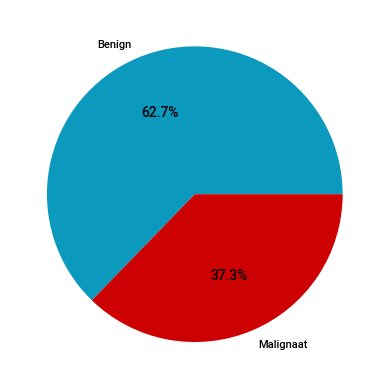

In [25]:
plt.pie(data['diagnosis'].value_counts().values, labels = ['Benign', 'Malignaat'], colors = ['#0b99be', '#cd0101'], 
        autopct = '%1.1f%%')

plt.show()


Insights

id : Unqiue  values

Diagnosis : Target varaible with 2 classes.Having 63% of Benign cases and 37% cases of malignant .Malignant is more fatal tha  benign.

radius_mean : It has numerical data with 80% distinct values and a range between 7.0 to 28.1 .It has a positive skew of 0.942 with a Standard deviation of 3.52 and kurtosis of 0.846.

texture_mean :It has numerical data with 84% distinct values and a range between 9.7 to 39.3 .It has a positive skew of 0.650 with a Standard deviation of 4.30 and kurtosis of 0.758

perimeter_mean : It has numerical data with 92% distinct values and a range between 44 to 188 .It has a positive skew of 0.991 with a Standard deviation of 24.3 and kurtosis of 0.972

area_mean : It has numerical data with 95% distinct values and a range between 144 to 2,501 .It has a (highly skewed) positive skew of 1.65 with a Standard deviation of 352 and kurtosis of 3.65

smoothness_mean : It has numerical data with 83% distinct values and a range between 0.053 to 0.163 .It has a positive skew of 0.456 with a Standard deviation of 0.014 and kurtosis of 0.856

compactness_mean : It has numerical data with 94% distinct values and a range between 0.019 to 0.345 . It has a (highly skewed) positive skew of 1.19 with a Standard deviation of 0.053 and kurtosis of 1.65

concavity_mean : It has numerical data with 94% distinct values and a range between 0.000 to 0.427 . It has a (highly skewed) positive skew of 1.40 with a Standard deviation of 0.080 and kurtosis of 2.00

concave point_mean :It has numerical data with 94% distinct values and a range between 0.000 to 0.201 . It has a (highly skewed) positive skew of 1.17 with a Standard deviation of 0.039 and kurtosis of 1.07

symmetry_mean : It has numerical data with 76% distinct values and a range between 0.106 to 0.304 . It has a positive skew of 0.726 with a Standard deviation of 0.027 and kurtosis of 1.29

Fractal_dimension_mean : It has numerical data with 88% distinct values and a range between 0.050 to 0.097 . It has a (highly skewed) positive skew of 1.30 with a Standard deviation of 0.007 and kurtosis of 3.01

radius_se : It has numerical data with 95% distinct values and a range between 0.11 to 2.87 . It has a positive skew of 3.09 with a Standard deviation of 0.277 and kurtosis of 17.7

texture_se : It has numerical data with 91% distinct values and a range between 0.36 to 4.88 . It has a (highly skewed) positive skew of 1.65 with a Standard deviation of 0.552 and kurtosis of 17.7

Perimeter_se : It has numerical data with 95% distinct values and a range between 0.8 to 22.0. It has a (highly skewed) positive skew of 3.44 with a Standard deviation of 2.02 and kurtosis of 21.4

area_se : It has numerical data with 93% distinct values and a range between 7 to 542 . It has a positive skew of (highly skewed) 5.45 with a Standard deviation of 45.5 and kurtosis of 49.2

smoothness_se :It has numerical data with 96% distinct values and a range between 0.002 to 0.031 . It has a (highly skewed) positive skew of 2.31 with a Standard deviation of 0.003 and kurtosis of 10.5

compactness_se : It has numerical data with 95% distinct values and a range between 0.002 to 0.135 . It has a (highly skewed) positive skew of 1.09 with a Standard deviation of 0.018 and kurtosis of 5.11

concavity_se : It has numerical data  with 2% of  zeroes and  94% distinct values within the range  0.000 to 0.135 . It has a (highly skewed) positive skew of 1.396 with a Standard deviation of 0.030 and kurtosis of 48.9

Concave points_se : It has numerical data  with 2% of  zeroes and  89% distinct values within the range  0.000 to 0.053 . It has a  (highly skewed) positive skew of 1.44 with a Standard deviation of 0.006 and kurtosis of 5.13

symmetry_se : It has numerical data with 88% distinct values and a range between 0.008 to 0.079 . It has a (highly skewed)  positive skew of 2.20 with a Standard deviation of 0.008 and kurtosis of 7.90

fractal_dimension_se : It has numerical data with 96% distinct values and a range between 0.001 to 0.030 . It has a (highly skewed) positive skew of 3.92 with a Standard deviation of 0.018 and kurtosis of 26.3

radius_worst : It has numerical data with 80% distinct values and a range between 7.9 to 36.0 . It has a  (highly skewed) positive skew  of 1.10 with a Standard deviation of 4.83 and kurtosis of 0.944

Tecture_worst : It has numerical data with 90% distinct values and a range between 12.9 to 49.5 . It has a positive skew  of 0.478 with a Standard deviation of 6.15 and kurtosis of 0.498

perimeter_worst :  It has numerical data with 90% distinct values and a range between 50 to 251 . It has a (highly skewed) positive skew  of 1.13 with a Standard deviation of 33.6 and kurtosis of 1.07

area_worst :  It has numerical data with 96% distinct values and a range between 185 to 4,254 . It has a (highly skewed) positive skew of 1.86 with a Standard deviation of 569 and kurtosis of 4.40

smoothness_worst :  It has numerical data with 72% distinct values and a range between 0.071 to 0.223 . It has a positive skew of 0.415 with a Standard deviation of 0.023 and kurtosis of 0.518 (broad peak and thick tail)

compactness_worst : It has numerical data with 93% distinct values and a range between 0.03 to 1.06 . It has a (highly skewed) positive skew  of 1.47 with a Standard deviation of 0.157 and kurtosis of 3.04 (thin bell , with highy peak)

concavity_worst :  It has numerical data  with 2% of  zeroes and  95% distinct values within the range  0.00 to 1.25 . It has a  (highly skewed) positive skew of 1.15 with a Standard deviation of 0.209 and kurtosis of 1.62

cincave_points_worst : It has numerical data  with 2% of  zeroes and  86% distinct values within the range  0.000 to 0.291 . It has a positive skew of 0.493 with a Standard deviation of 0.066 and kurtosis of -0.536

symmetry_worst : It has numerical data with 88% distinct values and a range between 0.157 to 0.664 . It has a (highly skewed) positive skew of 1.43 with a Standard deviation of 0.062 and kurtosis of 4.44 (thin bell , with highy peak)

Freactal_dimension_worst:  It has numerical data with 94% distinct values and a range between 0.055 to 0.207 . It has a (highly skewed) positive skew  of 1.66 with a Standard deviation of 0.018 and kurtosis of 5.24 (thin bell , with highy peak)

### Bivariate Analaysis


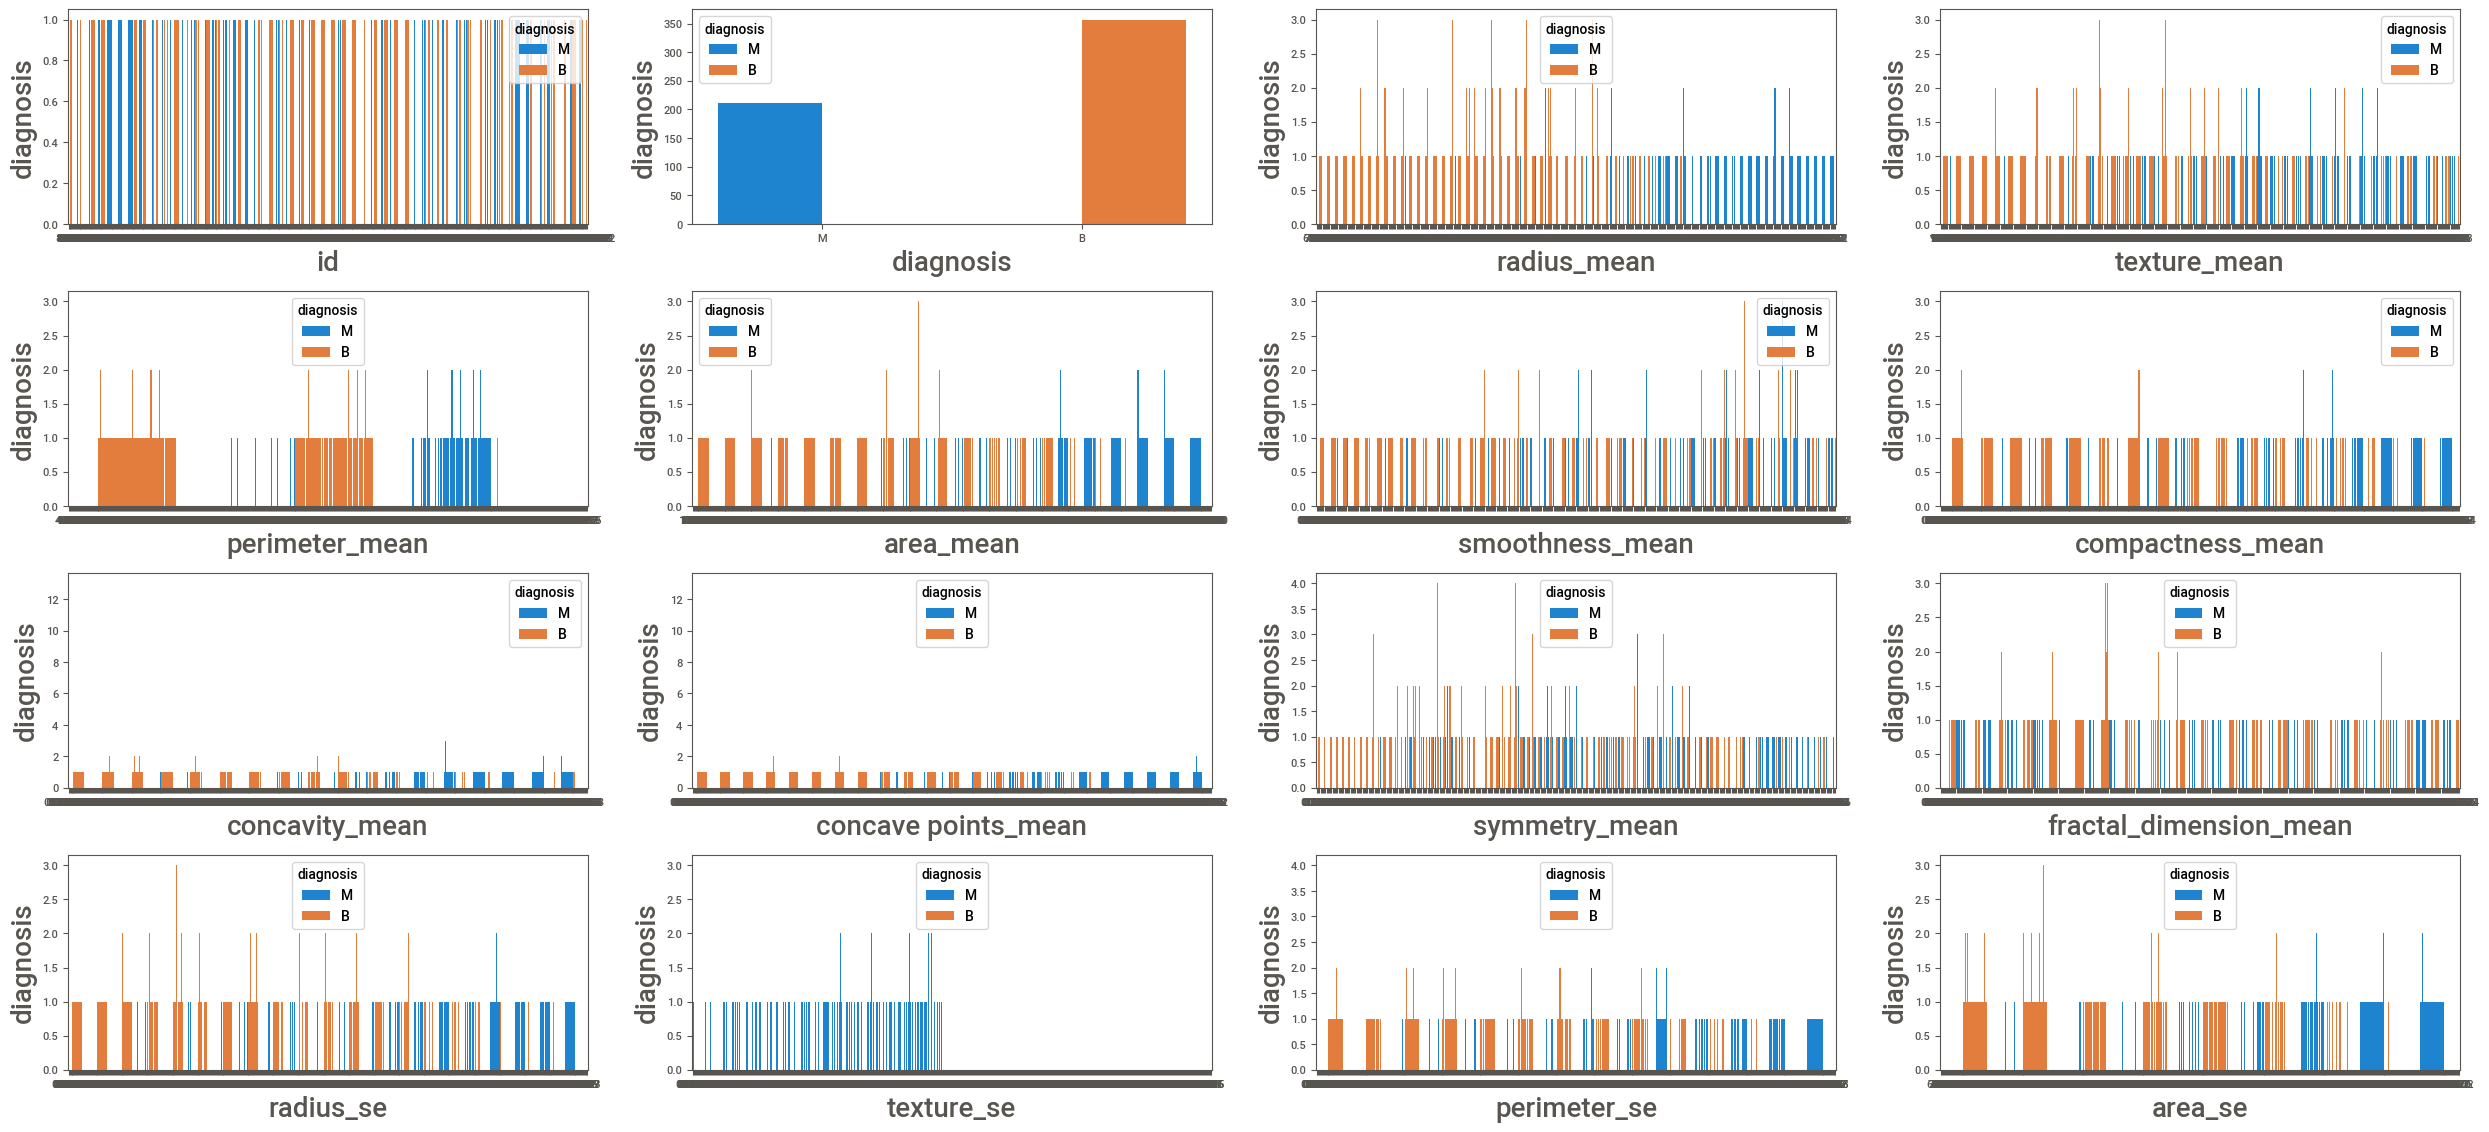

In [26]:
#Bivariate analysis on catogirical data

plt.figure(figsize=(25,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in data:#accessing the columns 
    if plotnumber<=16 :
        ax = plt.subplot(9,4,plotnumber)
        sns.countplot(x=data[column],hue=data['diagnosis'])#count plot for categorical data
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('diagnosis',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

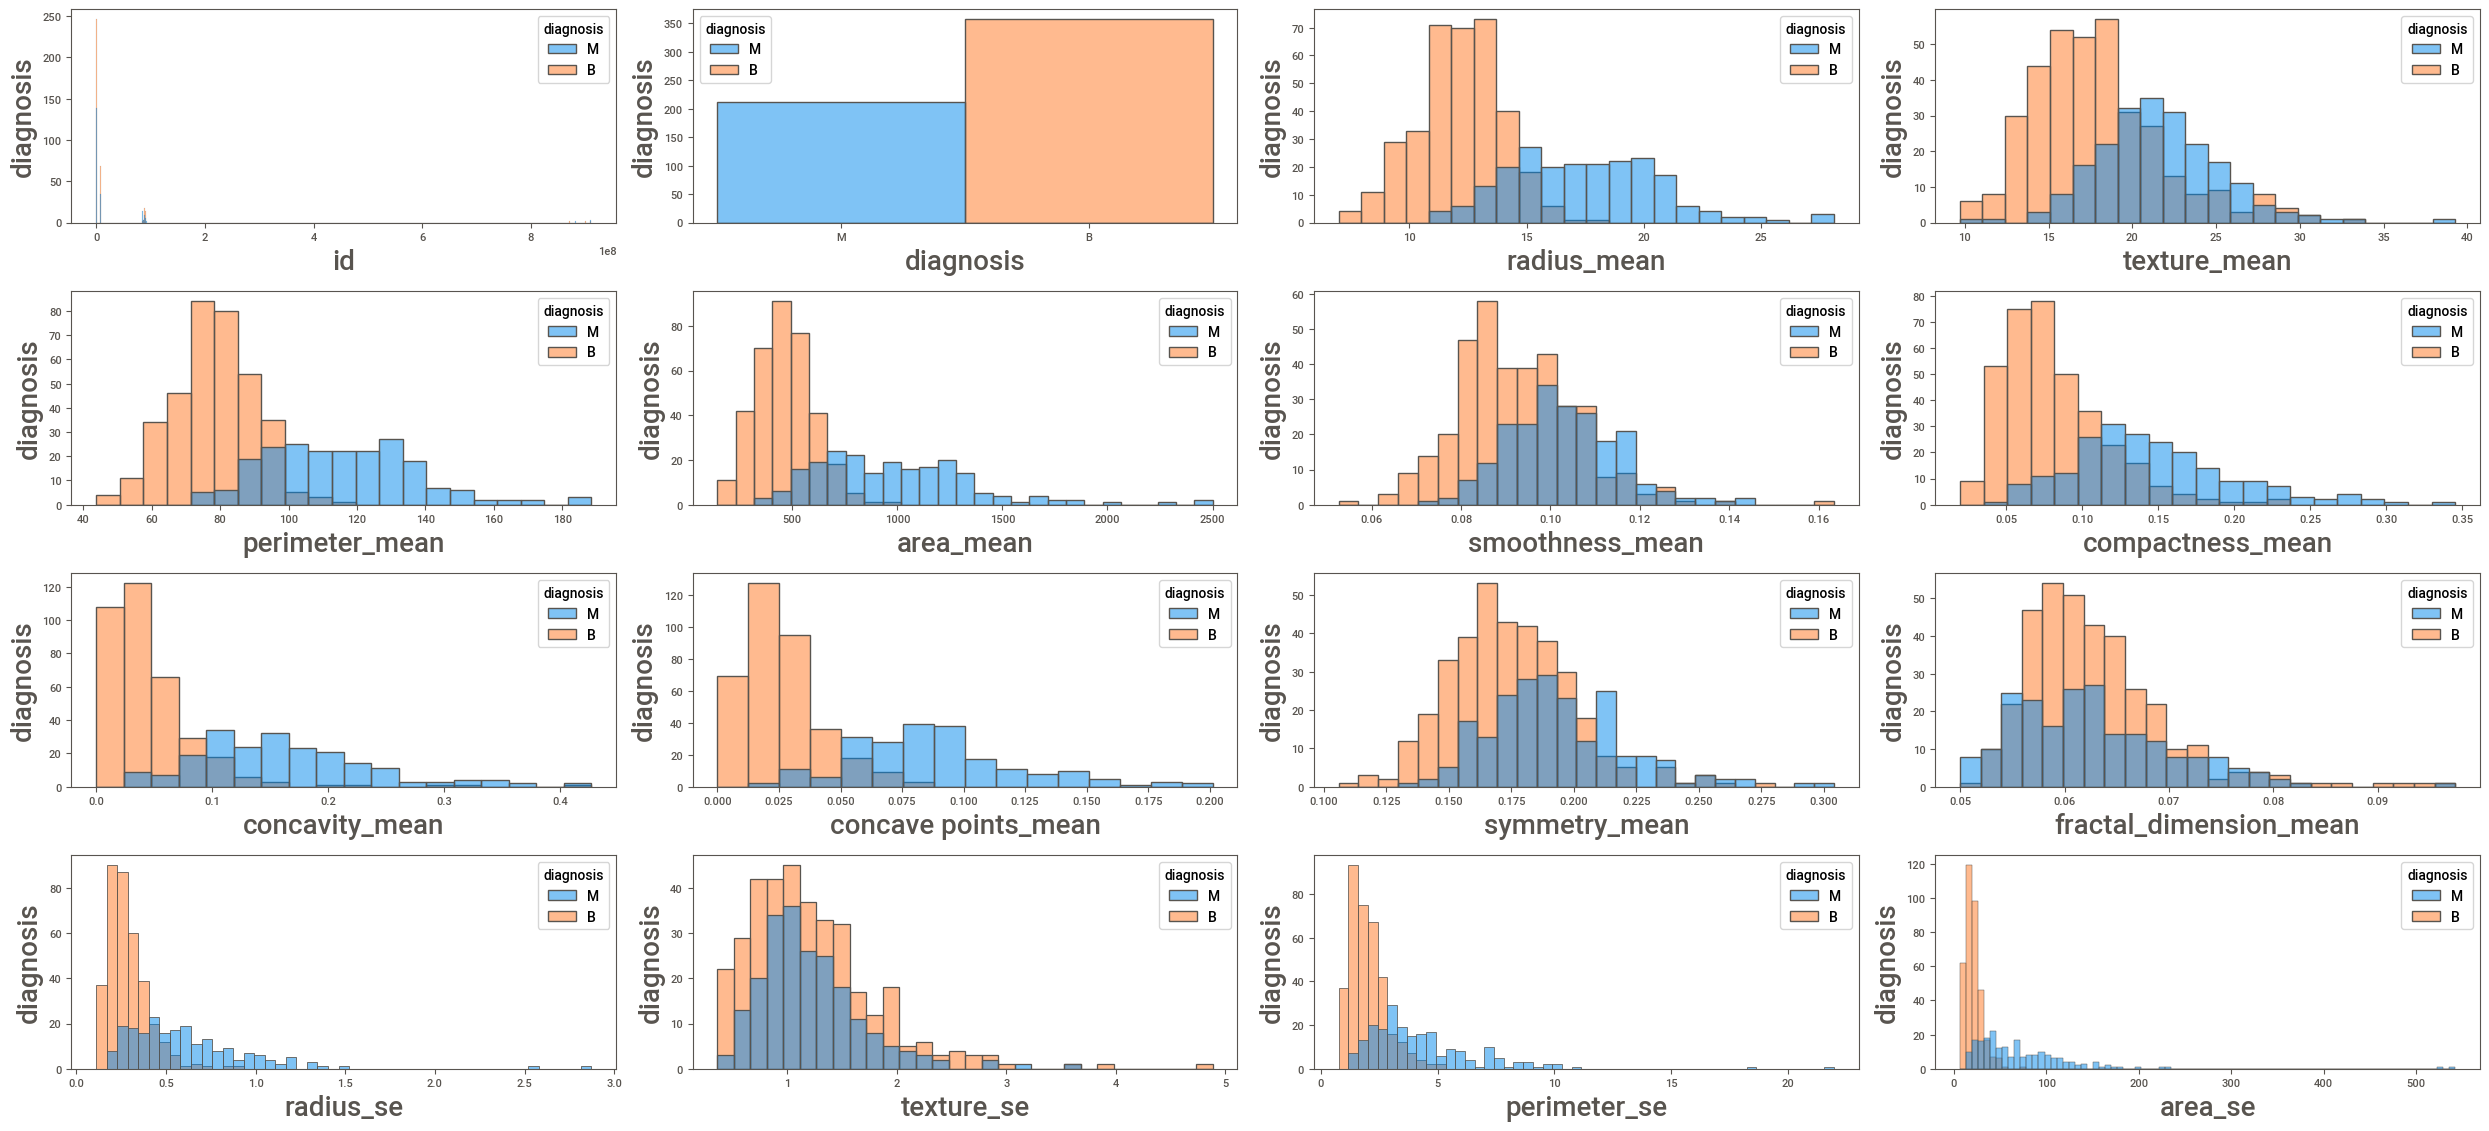

In [27]:
#Bivariate analysis on catogirical data

plt.figure(figsize=(25,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in data:#accessing the columns 
    if plotnumber<=16 :
        ax = plt.subplot(9,4,plotnumber)
        sns.histplot(x=data[column],hue=data['diagnosis'])#count plot for categorical data
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('diagnosis',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

### Data Preprocessing Pipeline

In [24]:
#Handling the missing values
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### No missing values in the dataset

In [25]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##### convert catgorical data into numerical data


In [26]:
#converting target variable
data.diagnosis=data.diagnosis.map({'M':1,'B':0})

In [27]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


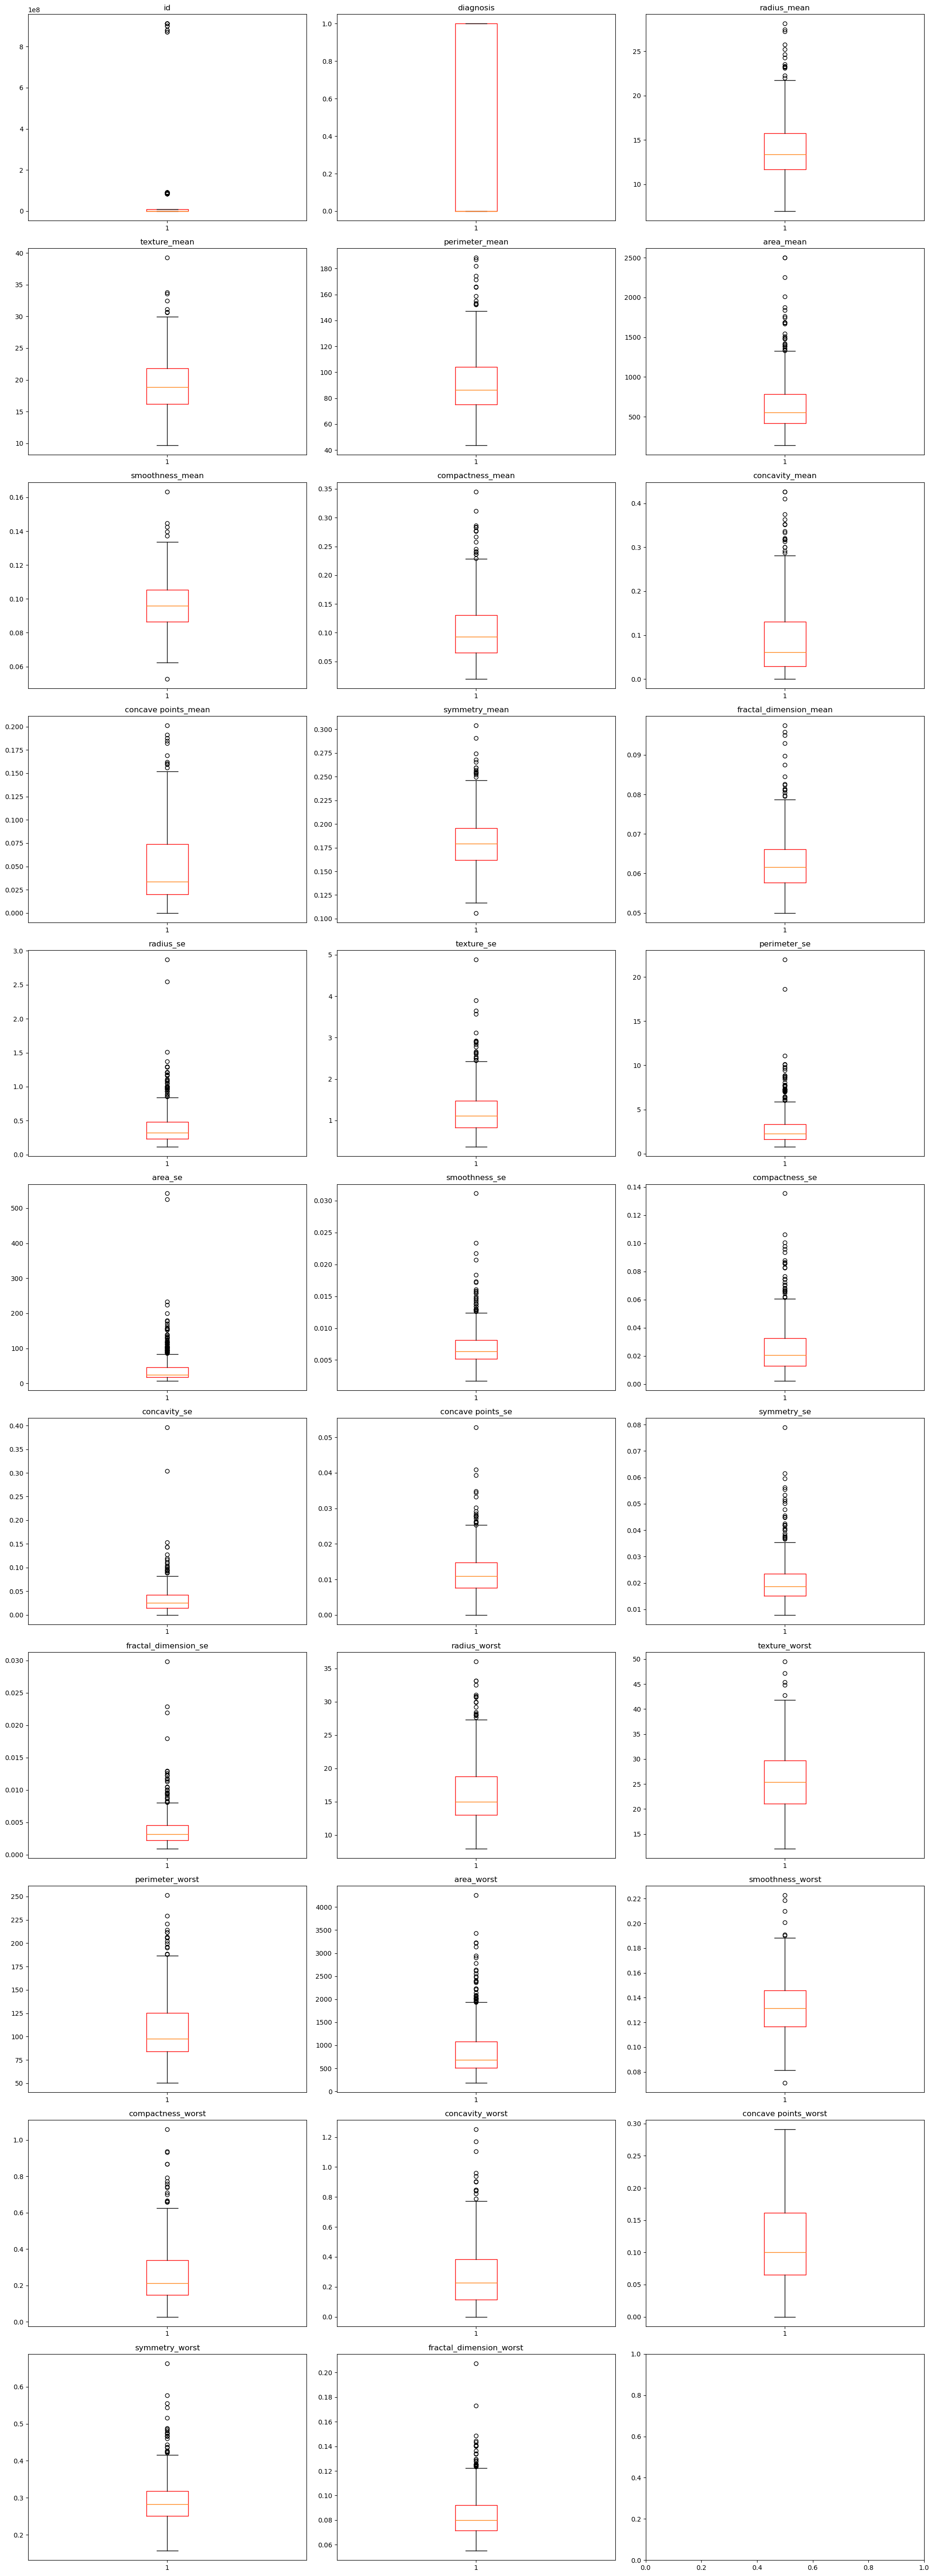

In [28]:
numeric_cols = data.select_dtypes(include=[float, int]).columns
num_plots = len(numeric_cols)
num_cols = 3  # number of columns per row
num_rows = int(np.ceil(num_plots/num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5*num_rows))

for i, col_name in enumerate(numeric_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].boxplot(data[col_name], boxprops=dict(color='red'))
    axes[row, col].set_title(col_name)


plt.tight_layout()  # adjust subplot spacing
plt.show()

In [29]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##### radius_mean

In [30]:
from scipy import stats

IQR=stats.iqr(data.radius_mean,interpolation='midpoint')
IQR
Q1=data.radius_mean.quantile(0.25)
Q3=data.radius_mean.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [31]:
data.loc[data['radius_mean']<min_limit]
data.loc[data['radius_mean']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,8611555,1,25.22,24.91,171.5,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.01065,0.005893,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,1,22.27,19.67,152.8,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,1,24.25,20.20,166.2,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.023330,0.09806,0.12780,0.01822,0.04547,0.009875,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
164,8712289,1,23.27,22.04,152.1,1686.0,0.08439,0.1145,0.1324,0.09702,0.1801,0.05553,0.6642,0.8561,4.603,97.85,0.004910,0.02544,0.02822,0.01623,0.01956,0.003740,28.01,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
180,873592,1,27.22,21.87,182.1,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,0.05770,0.8361,1.4810,5.820,128.70,0.004631,0.02537,0.03109,0.01241,0.01575,0.002747,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
202,878796,1,23.29,26.67,158.9,1685.0,0.11410,0.2084,0.3523,0.16200,0.2200,0.06229,0.5539,1.5600,4.667,83.16,0.009327,0.05121,0.08958,0.02465,0.02175,0.005195,25.12,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762
212,8810703,1,28.11,18.47,188.5,2499.0,0.11420,0.1516,0.3201,0.15950,0.1648,0.05525,2.8730,1.4760,21.980,525.60,0.013450,0.02772,0.06389,0.01407,0.04783,0.004476,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
236,88299702,1,23.21,26.97,153.5,1670.0,0.09509,0.1682,0.1950,0.12370,0.1909,0.06309,1.0580,0.9635,7.247,155.80,0.006428,0.02863,0.04497,0.01716,0.01590,0.003053,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
339,89812,1,23.51,24.27,155.1,1747.0,0.10690,0.1283,0.2308,0.14100,0.1797,0.05506,1.0090,0.9245,6.462,164.10,0.006292,0.01971,0.03582,0.01301,0.01479,0.003118,30.67,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738
352,899987,1,25.73,17.46,174.2,2010.0,0.11490,0.2363,0.3368,0.19130,0.1956,0.06121,0.9948,0.8509,7.222,153.10,0.006369,0.04243,0.04266,0.01508,0.02335,0.003385,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815


In [32]:
len(data.loc[data['radius_mean']<min_limit])


0

In [33]:
len(data.loc[data['radius_mean']>max_limit])

14

In [34]:
data.shape

(569, 32)

In [35]:
14/569*100

2.460456942003515

In [36]:
 # as there are less than 5% outliers we'll handle

In [37]:
data.loc[data['radius_mean']>max_limit,'radius_mean']=np.median(data.radius_mean)

<AxesSubplot:xlabel='radius_mean'>

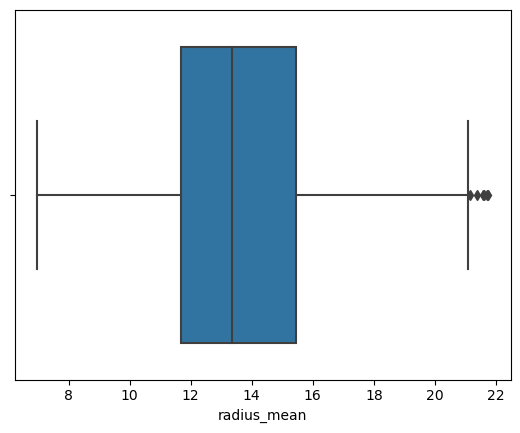

In [38]:
sns.boxplot(data.radius_mean)

##### texture_mean

In [39]:
IQR=stats.iqr(data.radius_mean,interpolation='midpoint')
IQR
Q1=data.texture_mean.quantile(0.25)
Q3=data.texture_mean.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [40]:
data.loc[data['texture_mean']<min_limit]
data.loc[data['texture_mean']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
15,84799002,1,14.540,27.54,96.73,658.8,0.11390,0.15950,0.163900,0.073640,0.2303,0.07077,0.3700,1.0330,2.879,32.55,0.005607,0.042400,0.047410,0.010900,0.018570,0.005466,17.46,37.13,124.10,943.2,0.16780,0.65770,0.70260,0.17120,0.4218,0.13410
219,88119002,1,19.530,32.47,128.00,1223.0,0.08420,0.11300,0.114500,0.066370,0.1428,0.05313,0.7392,1.3210,4.722,109.90,0.005539,0.026440,0.026640,0.010780,0.013320,0.002256,27.90,45.41,180.20,2477.0,0.14080,0.40970,0.39950,0.16250,0.2713,0.07568
232,88203002,0,11.220,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,0.1845,0.05828,0.2239,1.6470,1.489,15.46,0.004359,0.006813,0.003223,0.003419,0.019160,0.002534,12.36,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307
233,88206102,1,20.510,27.81,134.40,1319.0,0.09159,0.10740,0.155400,0.083400,0.1448,0.05592,0.5240,1.1890,3.767,70.01,0.005020,0.020620,0.034570,0.010910,0.012980,0.002887,24.47,37.38,162.70,1872.0,0.12230,0.27610,0.41460,0.15630,0.2437,0.08328
238,883270,0,14.220,27.85,92.55,623.9,0.08223,0.10390,0.110300,0.044080,0.1342,0.06129,0.3354,2.3240,2.105,29.96,0.006307,0.028450,0.038500,0.010110,0.011850,0.003589,15.75,40.54,102.50,764.0,0.10810,0.24260,0.30640,0.08219,0.1890,0.07796
239,88330202,1,17.460,39.28,113.40,920.6,0.09812,0.12980,0.141700,0.088110,0.1809,0.05966,0.5366,0.8561,3.002,49.00,0.004860,0.027850,0.026020,0.013740,0.012260,0.002759,22.51,44.87,141.20,1408.0,0.13650,0.37350,0.32410,0.20660,0.2853,0.08496
256,88649001,1,19.550,28.77,133.60,1207.0,0.09260,0.20630,0.178400,0.114400,0.1893,0.06232,0.8426,1.1990,7.158,106.40,0.006356,0.047650,0.038630,0.015190,0.019360,0.005252,25.05,36.27,178.60,1926.0,0.12810,0.53290,0.42510,0.19410,0.2818,0.10050
259,88725602,1,15.530,33.56,103.70,744.9,0.10630,0.16390,0.175100,0.083990,0.2091,0.06650,0.2419,1.2780,1.903,23.02,0.005345,0.025560,0.028890,0.010220,0.009947,0.003359,18.49,49.54,126.30,1035.0,0.18830,0.55640,0.57030,0.20140,0.3512,0.12040
265,88995002,1,20.730,31.12,135.70,1419.0,0.09469,0.11430,0.136700,0.086460,0.1769,0.05674,1.1720,1.6170,7.749,199.70,0.004551,0.014780,0.021430,0.009280,0.013670,0.002299,32.49,47.16,214.00,3432.0,0.14010,0.26440,0.34420,0.16590,0.2868,0.08218
377,9013579,0,13.460,28.21,85.89,562.1,0.07517,0.04726,0.012710,0.011170,0.1421,0.05763,0.1689,1.1500,1.400,14.91,0.004942,0.012030,0.007508,0.005179,0.014420,0.001684,14.69,35.63,97.11,680.6,0.11080,0.14570,0.07934,0.05781,0.2694,0.07061


In [41]:
len(data.loc[data['texture_mean']<min_limit])

2

In [42]:
len(data.loc[data['texture_mean']>max_limit])

28

In [43]:
28/569*100

4.92091388400703

In [44]:
# as there are less than 5% outliers we'll handle

In [45]:
data.loc[data['radius_mean']<min_limit,'texture_mean']=np.median(data.texture_mean)

In [46]:
data.loc[data['radius_mean']>max_limit,'texture_mean']=np.median(data.texture_mean)

<AxesSubplot:xlabel='texture_mean'>

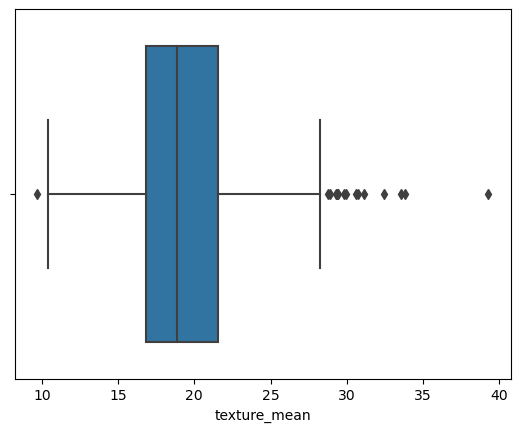

In [47]:
sns.boxplot(data.texture_mean)

##### perimeter_mean

In [48]:
IQR=stats.iqr(data.perimeter_mean,interpolation='midpoint')
IQR
Q1=data.perimeter_mean.quantile(0.25)
Q3=data.perimeter_mean.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [49]:
data.loc[data['perimeter_mean']<min_limit]
data.loc[data['perimeter_mean']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,8611555,1,13.37,24.91,171.5,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.01065,0.005893,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,1,13.37,19.67,152.8,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,1,13.37,20.20,166.2,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.023330,0.09806,0.12780,0.01822,0.04547,0.009875,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
164,8712289,1,13.37,22.04,152.1,1686.0,0.08439,0.1145,0.1324,0.09702,0.1801,0.05553,0.6642,0.8561,4.603,97.85,0.004910,0.02544,0.02822,0.01623,0.01956,0.003740,28.01,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
180,873592,1,13.37,21.87,182.1,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,0.05770,0.8361,1.4810,5.820,128.70,0.004631,0.02537,0.03109,0.01241,0.01575,0.002747,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
202,878796,1,13.37,26.67,158.9,1685.0,0.11410,0.2084,0.3523,0.16200,0.2200,0.06229,0.5539,1.5600,4.667,83.16,0.009327,0.05121,0.08958,0.02465,0.02175,0.005195,25.12,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762
212,8810703,1,13.37,18.47,188.5,2499.0,0.11420,0.1516,0.3201,0.15950,0.1648,0.05525,2.8730,1.4760,21.980,525.60,0.013450,0.02772,0.06389,0.01407,0.04783,0.004476,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
236,88299702,1,13.37,26.97,153.5,1670.0,0.09509,0.1682,0.1950,0.12370,0.1909,0.06309,1.0580,0.9635,7.247,155.80,0.006428,0.02863,0.04497,0.01716,0.01590,0.003053,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
339,89812,1,13.37,24.27,155.1,1747.0,0.10690,0.1283,0.2308,0.14100,0.1797,0.05506,1.0090,0.9245,6.462,164.10,0.006292,0.01971,0.03582,0.01301,0.01479,0.003118,30.67,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738
352,899987,1,13.37,17.46,174.2,2010.0,0.11490,0.2363,0.3368,0.19130,0.1956,0.06121,0.9948,0.8509,7.222,153.10,0.006369,0.04243,0.04266,0.01508,0.02335,0.003385,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815


In [50]:
len(data.loc[data['perimeter_mean']<min_limit])

0

In [51]:
len(data.loc[data['perimeter_mean']>max_limit])

13

In [52]:
13/569*100

2.2847100175746924

In [53]:
# as there are less than 5% outliers we'll handle

In [54]:
data.loc[data['perimeter_mean']>max_limit,'perimeter_mean']=np.median(data.perimeter_mean)

<AxesSubplot:xlabel='perimeter_mean'>

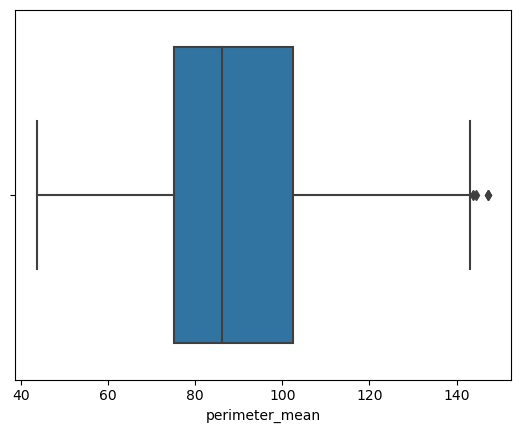

In [55]:
sns.boxplot(data.perimeter_mean)

##### area_mean

In [56]:
IQR=stats.iqr(data.area_mean,interpolation='midpoint')
IQR
Q1=data.area_mean.quantile(0.25)
Q3=data.area_mean.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [57]:
data.loc[data['area_mean']<min_limit]
data.loc[data['area_mean']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
23,851509,1,21.16,23.04,137.20,1404.0,0.09428,0.10220,0.1097,0.08632,0.1769,0.05278,0.6917,1.1270,4.303,93.99,0.004728,0.01259,0.01715,0.01038,0.01083,0.001987,29.17,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526
82,8611555,1,13.37,24.91,86.24,1878.0,0.10630,0.26650,0.3339,0.18450,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.01065,0.005893,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,1,13.37,19.67,86.24,1509.0,0.13260,0.27680,0.4264,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,1,13.37,20.20,86.24,1761.0,0.14470,0.28670,0.4268,0.20120,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.023330,0.09806,0.12780,0.01822,0.04547,0.009875,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
164,8712289,1,13.37,22.04,86.24,1686.0,0.08439,0.11450,0.1324,0.09702,0.1801,0.05553,0.6642,0.8561,4.603,97.85,0.004910,0.02544,0.02822,0.01623,0.01956,0.003740,28.01,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
180,873592,1,13.37,21.87,86.24,2250.0,0.10940,0.19140,0.2871,0.18780,0.1800,0.05770,0.8361,1.4810,5.820,128.70,0.004631,0.02537,0.03109,0.01241,0.01575,0.002747,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
202,878796,1,13.37,26.67,86.24,1685.0,0.11410,0.20840,0.3523,0.16200,0.2200,0.06229,0.5539,1.5600,4.667,83.16,0.009327,0.05121,0.08958,0.02465,0.02175,0.005195,25.12,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762
212,8810703,1,13.37,18.47,86.24,2499.0,0.11420,0.15160,0.3201,0.15950,0.1648,0.05525,2.8730,1.4760,21.980,525.60,0.013450,0.02772,0.06389,0.01407,0.04783,0.004476,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
236,88299702,1,13.37,26.97,86.24,1670.0,0.09509,0.16820,0.1950,0.12370,0.1909,0.06309,1.0580,0.9635,7.247,155.80,0.006428,0.02863,0.04497,0.01716,0.01590,0.003053,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
250,884948,1,20.94,23.56,138.90,1364.0,0.10070,0.16060,0.2712,0.13100,0.2205,0.05898,1.0040,0.8208,6.372,137.90,0.005283,0.03908,0.09518,0.01864,0.02401,0.005002,25.58,27.00,165.3,2010.0,0.1211,0.3172,0.6991,0.2105,0.3126,0.07849


In [58]:
len(data.loc[data['area_mean']<min_limit])

0

In [59]:
len(data.loc[data['area_mean']>max_limit])

25

In [60]:
25/569*100

4.393673110720562

In [61]:
# as there are less than 5% outliers we'll handle

In [62]:
data.loc[data['area_mean']>max_limit,'area_mean']=np.median(data.area_mean)

<AxesSubplot:xlabel='area_mean'>

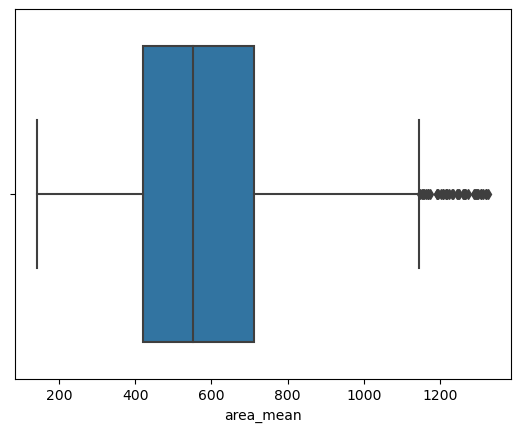

In [63]:
sns.boxplot(data.area_mean)

##### smoothness_mean

In [64]:
IQR=stats.iqr(data.smoothness_mean,interpolation='midpoint')
IQR
Q1=data.smoothness_mean.quantile(0.25)
Q3=data.smoothness_mean.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [65]:
data.loc[data['smoothness_mean']<min_limit]
data.loc[data['smoothness_mean']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,1,11.420,20.38,77.58,386.1,0.1425,0.2839,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
105,863030,1,13.110,15.56,87.21,530.2,0.1398,0.1765,0.20710,0.09601,0.1925,0.07692,0.3908,0.9238,2.410,34.66,0.007162,0.02912,0.05473,0.01388,0.01547,0.007098,16.31,22.40,106.40,827.2,0.1862,0.4099,0.63760,0.19860,0.3147,0.14050
122,865423,1,13.370,20.20,86.24,551.1,0.1447,0.2867,0.42680,0.20120,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.023330,0.09806,0.12780,0.01822,0.04547,0.009875,26.02,23.99,180.90,2073.0,0.1696,0.4244,0.58030,0.22480,0.3222,0.08009
504,915186,0,9.268,18.84,61.49,248.7,0.1634,0.2239,0.09730,0.05252,0.2378,0.09502,0.4076,1.0930,3.014,20.04,0.009783,0.04542,0.03483,0.02188,0.02542,0.010450,10.28,16.38,69.05,300.2,0.1902,0.3441,0.20990,0.10250,0.3038,0.12520
520,917092,0,9.295,18.84,59.96,257.8,0.1371,0.1225,0.03332,0.02421,0.2197,0.07696,0.3538,1.1300,2.388,19.63,0.015460,0.02540,0.02197,0.01580,0.03997,0.003901,10.57,17.84,67.84,326.6,0.1850,0.2097,0.09996,0.07262,0.3681,0.08982


In [66]:
len(data.loc[data['smoothness_mean']<min_limit])

1

In [67]:
len(data.loc[data['smoothness_mean']>max_limit])

5

In [68]:
# as there are less than 5% outliers we'll handle (both in max and min limit)

In [69]:
5/569*100

0.8787346221441126

In [70]:
data.loc[data['smoothness_mean']<min_limit,'smoothness_mean']=np.median(data.texture_mean)

In [71]:
data.loc[data['smoothness_mean']>max_limit,'smoothness_mean']=np.median(data.smoothness_mean)

<AxesSubplot:xlabel='smoothness_mean'>

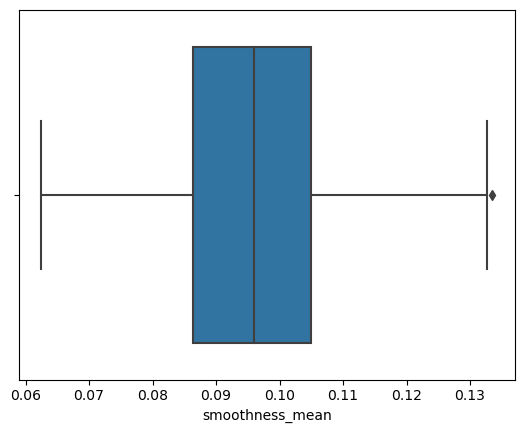

In [72]:
sns.boxplot(data.smoothness_mean)

##### compactness_mean

In [73]:
IQR=stats.iqr(data.compactness_mean,interpolation='midpoint')
IQR
Q1=data.compactness_mean.quantile(0.25)
Q3=data.compactness_mean.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [74]:
data.loc[data['compactness_mean']<min_limit]
data.loc[data['compactness_mean']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
3,84348301,1,11.42,20.38,77.58,386.1,0.09592,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.2396,0.2273,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750
12,846226,1,19.17,24.80,132.40,1123.0,0.09740,0.2458,0.2065,0.11180,0.2397,0.07800,0.9555,3.5680,11.070,116.20,0.003139,0.08297,0.08890,0.04090,0.04484,0.012840,20.96,29.94,151.70,1332.0,0.1037,0.3903,0.3639,0.1767,0.3176,0.10230
14,84667401,1,13.73,22.61,93.60,578.3,0.11310,0.2293,0.2128,0.08025,0.2069,0.07682,0.2121,1.1690,2.061,19.21,0.006429,0.05936,0.05501,0.01628,0.01961,0.008093,15.03,32.01,108.80,697.7,0.1651,0.7725,0.6943,0.2208,0.3596,0.14310
78,8610862,1,20.18,23.97,143.70,1245.0,0.12860,0.3454,0.3754,0.16040,0.2906,0.08142,0.9317,1.8850,8.649,116.40,0.010380,0.06835,0.10910,0.02593,0.07895,0.005987,23.37,31.72,170.30,1623.0,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964
82,8611555,1,13.37,24.91,86.24,551.1,0.10630,0.2665,0.3339,0.18450,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.01065,0.005893,30.00,33.62,211.70,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,1,13.37,19.67,86.24,551.1,0.13260,0.2768,0.4264,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,1,13.37,20.20,86.24,551.1,0.09592,0.2867,0.4268,0.20120,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.023330,0.09806,0.12780,0.01822,0.04547,0.009875,26.02,23.99,180.90,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
181,873593,1,21.09,26.57,142.70,1311.0,0.11410,0.2832,0.2487,0.14960,0.2395,0.07398,0.6298,0.7629,4.414,81.46,0.004253,0.04759,0.03872,0.01567,0.01798,0.005295,26.68,33.48,176.50,2089.0,0.1491,0.7584,0.6780,0.2903,0.4098,0.12840


In [75]:
len(data.loc[data['compactness_mean']<min_limit])

0

In [76]:
len(data.loc[data['compactness_mean']>max_limit])

16

In [77]:
# as there are less than 5% outliers we'll handle (in max limit)

In [78]:
16/569*100

2.8119507908611596

In [79]:
data.loc[data['smoothness_mean']>max_limit,'smoothness_mean']=np.median(data.smoothness_mean)

<AxesSubplot:xlabel='smoothness_mean'>

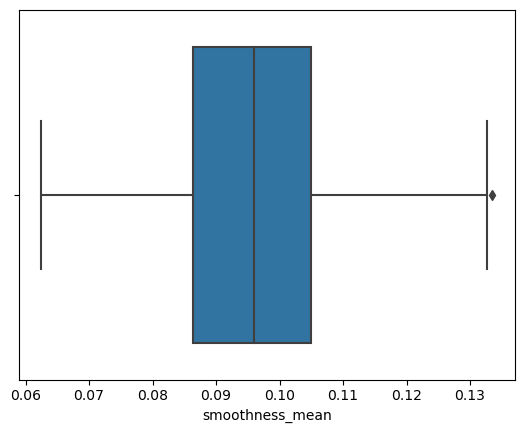

In [80]:
sns.boxplot(data.smoothness_mean)

##### concavity_mean

In [81]:
IQR=stats.iqr(data.concavity_mean,interpolation='midpoint')
IQR
Q1=data.concavity_mean.quantile(0.25)
Q3=data.concavity_mean.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [82]:
data.loc[data['concavity_mean']<min_limit]
data.loc[data['concavity_mean']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.990,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.2654,0.4601,0.11890
68,859471,0,9.029,18.84,58.79,250.5,0.10660,0.1413,0.3130,0.04375,0.2111,0.08046,0.3274,1.1940,1.885,17.67,0.009549,0.08606,0.30380,0.03322,0.04197,0.009559,10.31,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.1750,0.4228,0.11750
78,8610862,1,20.180,23.97,143.70,1245.0,0.12860,0.3454,0.3754,0.16040,0.2906,0.08142,0.9317,1.8850,8.649,116.40,0.010380,0.06835,0.10910,0.02593,0.07895,0.005987,23.37,31.72,170.30,1623.0,0.16390,0.6164,0.7681,0.2508,0.5440,0.09964
82,8611555,1,13.370,24.91,86.24,551.1,0.10630,0.2665,0.3339,0.18450,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.01065,0.005893,30.00,33.62,211.70,2562.0,0.15730,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,1,13.370,19.67,86.24,551.1,0.13260,0.2768,0.4264,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.40,28.01,206.80,2360.0,0.17010,0.6997,0.9608,0.2910,0.4055,0.09789
112,86409,0,14.260,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,0.07769,0.3628,1.4900,3.399,29.25,0.005298,0.07446,0.14350,0.02292,0.02566,0.012980,15.30,23.73,107.00,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.10820
122,865423,1,13.370,20.20,86.24,551.1,0.09592,0.2867,0.4268,0.20120,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.023330,0.09806,0.12780,0.01822,0.04547,0.009875,26.02,23.99,180.90,2073.0,0.16960,0.4244,0.5803,0.2248,0.3222,0.08009
152,8710441,0,9.731,18.84,63.78,300.2,0.10720,0.1599,0.4108,0.07857,0.2548,0.09296,0.8245,2.6640,4.073,49.85,0.010970,0.09586,0.39600,0.05279,0.03546,0.029840,11.02,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.1571,0.3108,0.12590
180,873592,1,13.370,21.87,86.24,551.1,0.10940,0.1914,0.2871,0.18780,0.1800,0.05770,0.8361,1.4810,5.820,128.70,0.004631,0.02537,0.03109,0.01241,0.01575,0.002747,33.12,32.85,220.80,3216.0,0.14720,0.4034,0.5340,0.2688,0.2856,0.08082
202,878796,1,13.370,26.67,86.24,551.1,0.11410,0.2084,0.3523,0.16200,0.2200,0.06229,0.5539,1.5600,4.667,83.16,0.009327,0.05121,0.08958,0.02465,0.02175,0.005195,25.12,32.68,177.00,1986.0,0.15360,0.4167,0.7892,0.2733,0.3198,0.08762


In [83]:
len(data.loc[data['concavity_mean']<min_limit])

0

In [84]:
len(data.loc[data['concavity_mean']>max_limit])

18

##### as there are less than 5% outliers we'll handle (in max limit)

In [85]:
18/569*100

3.163444639718805

In [86]:
data.loc[data['concavity_mean']>max_limit,'concavity_mean']=np.median(data.concavity_mean)

<AxesSubplot:xlabel='concavity_mean'>

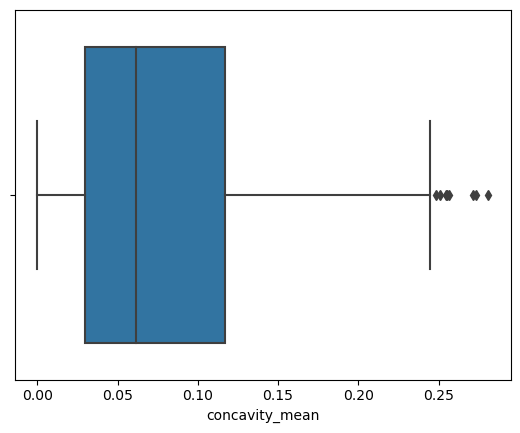

In [87]:
sns.boxplot(data.concavity_mean)

##### concave points_mean

In [88]:
IQR=stats.iqr(data['concave points_mean'],interpolation='midpoint')
IQR
Q1=data['concave points_mean'].quantile(0.25)
Q3=data['concave points_mean'].quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [89]:
data.loc[data['concave points_mean']<min_limit]
data.loc[data['concave points_mean']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
78,8610862,1,20.18,23.97,143.70,1245.0,0.12860,0.3454,0.06154,0.1604,0.2906,0.08142,0.9317,1.8850,8.649,116.40,0.010380,0.06835,0.10910,0.02593,0.07895,0.005987,23.37,31.72,170.3,1623.0,0.1639,0.6164,0.7681,0.2508,0.5440,0.09964
82,8611555,1,13.37,24.91,86.24,551.1,0.10630,0.2665,0.06154,0.1845,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.01065,0.005893,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,1,13.37,19.67,86.24,551.1,0.13260,0.2768,0.06154,0.1823,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,1,13.37,20.20,86.24,551.1,0.09592,0.2867,0.06154,0.2012,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.023330,0.09806,0.12780,0.01822,0.04547,0.009875,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
180,873592,1,13.37,21.87,86.24,551.1,0.10940,0.1914,0.06154,0.1878,0.1800,0.05770,0.8361,1.4810,5.820,128.70,0.004631,0.02537,0.03109,0.01241,0.01575,0.002747,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
202,878796,1,13.37,26.67,86.24,551.1,0.11410,0.2084,0.06154,0.1620,0.2200,0.06229,0.5539,1.5600,4.667,83.16,0.009327,0.05121,0.08958,0.02465,0.02175,0.005195,25.12,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762
212,8810703,1,13.37,18.47,86.24,551.1,0.11420,0.1516,0.06154,0.1595,0.1648,0.05525,2.8730,1.4760,21.980,525.60,0.013450,0.02772,0.06389,0.01407,0.04783,0.004476,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
352,899987,1,13.37,17.46,86.24,551.1,0.11490,0.2363,0.06154,0.1913,0.1956,0.06121,0.9948,0.8509,7.222,153.10,0.006369,0.04243,0.04266,0.01508,0.02335,0.003385,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
393,903516,1,21.61,22.28,144.40,551.1,0.11670,0.2087,0.28100,0.1562,0.2162,0.06606,0.6242,0.9209,4.158,80.99,0.005215,0.03726,0.04718,0.01288,0.02045,0.004028,26.23,28.74,172.0,2081.0,0.1502,0.5717,0.7053,0.2422,0.3828,0.10070
461,911296202,1,13.37,26.27,86.24,551.1,0.10840,0.1988,0.06154,0.1689,0.2061,0.05623,2.5470,1.3060,18.650,542.20,0.007650,0.05374,0.08055,0.02598,0.01697,0.004558,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


In [90]:
len(data.loc[data['concave points_mean']<min_limit])

0

In [91]:
len(data.loc[data['concave points_mean']>max_limit])

10

In [92]:
# as there are less than 5% outliers we'll handle (in max limit)

In [93]:
10/569*100

1.7574692442882252

In [94]:
data.loc[data['concave points_mean']>max_limit,'concave points_mean']=np.median(data['concave points_mean'])

<AxesSubplot:xlabel='concave points_mean'>

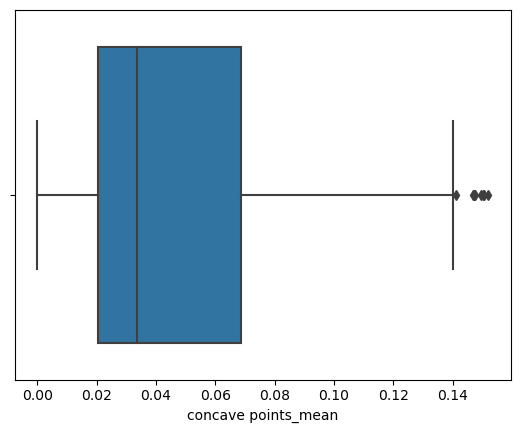

In [95]:
sns.boxplot(data['concave points_mean'])

##### symmetry_mean

In [96]:
IQR=stats.iqr(data.symmetry_mean,interpolation='midpoint')
IQR
Q1=data.symmetry_mean.quantile(0.25)
Q3=data.symmetry_mean.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [97]:

data.loc[data['symmetry_mean']<min_limit]
data.loc[data['symmetry_mean']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,1,11.420,20.38,77.58,386.1,0.09592,0.28390,0.241400,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.056610,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300
22,8511133,1,15.340,14.26,102.50,704.4,0.10730,0.21350,0.207700,0.09756,0.2521,0.07032,0.4388,0.7096,3.384,44.91,0.006789,0.05328,0.064460,0.022520,0.03672,0.004394,18.07,19.08,125.10,980.9,0.1390,0.59540,0.63050,0.23930,0.4667,0.09946
25,852631,1,17.140,16.40,116.00,912.7,0.11860,0.22760,0.222900,0.14010,0.3040,0.07413,1.0460,0.9760,7.276,111.40,0.008029,0.03799,0.037320,0.023970,0.02308,0.007444,22.25,21.40,152.40,1461.0,0.1545,0.39490,0.38530,0.25500,0.4066,0.10590
60,858970,0,10.170,18.84,64.55,311.9,0.11340,0.08061,0.010840,0.01290,0.2743,0.06960,0.5158,1.4410,3.312,34.62,0.007514,0.01099,0.007665,0.008193,0.04183,0.005953,11.02,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020
78,8610862,1,20.180,23.97,143.70,1245.0,0.12860,0.34540,0.061540,0.03350,0.2906,0.08142,0.9317,1.8850,8.649,116.40,0.010380,0.06835,0.109100,0.025930,0.07895,0.005987,23.37,31.72,170.30,1623.0,0.1639,0.61640,0.76810,0.25080,0.5440,0.09964
108,86355,1,13.370,19.67,86.24,551.1,0.13260,0.27680,0.061540,0.03350,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.104000,0.024800,0.03112,0.005037,28.40,28.01,206.80,2360.0,0.1701,0.69970,0.96080,0.29100,0.4055,0.09789
122,865423,1,13.370,20.20,86.24,551.1,0.09592,0.28670,0.061540,0.03350,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.023330,0.09806,0.127800,0.018220,0.04547,0.009875,26.02,23.99,180.90,2073.0,0.1696,0.42440,0.58030,0.22480,0.3222,0.08009
146,869691,1,11.800,16.58,78.99,432.0,0.10910,0.17000,0.165900,0.07415,0.2678,0.07371,0.3197,1.4260,2.281,24.72,0.005427,0.03633,0.046490,0.018430,0.05628,0.004635,13.74,26.38,91.93,591.7,0.1385,0.40920,0.45040,0.18650,0.5774,0.10300
150,871001501,0,13.000,20.78,83.51,519.4,0.11350,0.07589,0.031360,0.02645,0.2540,0.06087,0.4202,1.3220,2.873,34.78,0.007017,0.01142,0.019490,0.011530,0.02951,0.001533,14.16,24.11,90.82,616.7,0.1297,0.11050,0.08112,0.06296,0.3196,0.06435
152,8710441,0,9.731,18.84,63.78,300.2,0.10720,0.15990,0.061540,0.07857,0.2548,0.09296,0.8245,2.6640,4.073,49.85,0.010970,0.09586,0.396000,0.052790,0.03546,0.029840,11.02,19.49,71.04,380.5,0.1292,0.27720,0.82160,0.15710,0.3108,0.12590


In [98]:
len(data.loc[data['symmetry_mean']<min_limit])

1

In [99]:
len(data.loc[data['symmetry_mean']>max_limit])

14

In [100]:
# as there are less than 5% outliers we'll handle (in max limit)

In [101]:
18/569*100

3.163444639718805

In [102]:
data.loc[data['symmetry_mean']<min_limit,'symmetry_mean']=np.median(data.concavity_mean)

In [103]:
data.loc[data['symmetry_mean']>max_limit,'symmetry_mean']=np.median(data.concavity_mean)

<AxesSubplot:xlabel='symmetry_mean'>

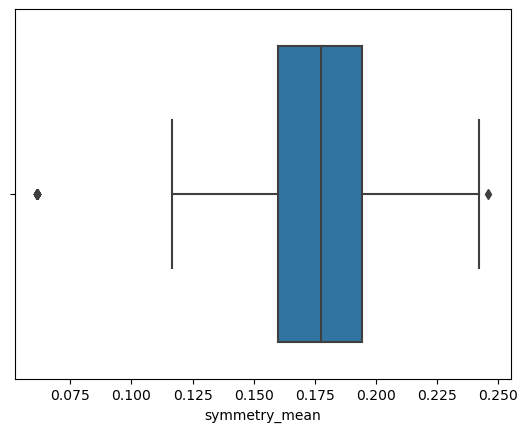

In [104]:
sns.boxplot(data.symmetry_mean)

In [105]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.06154,0.14710,0.24190,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.18120,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.20690,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.09592,0.28390,0.24140,0.10520,0.06154,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.18090,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##### fractal_dimension_mean	

In [106]:
IQR=stats.iqr(data.fractal_dimension_mean,interpolation='midpoint')
IQR
Q1=data.fractal_dimension_mean.quantile(0.25)
Q3=data.fractal_dimension_mean.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [107]:
data.loc[data['fractal_dimension_mean']<min_limit]
data.loc[data['fractal_dimension_mean']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,1,11.420,20.38,77.58,386.1,0.09592,0.2839,0.24140,0.10520,0.06154,0.09744,0.4956,1.1560,3.445,27.230,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
9,84501001,1,12.460,24.04,83.97,475.9,0.11860,0.2396,0.22730,0.08543,0.20300,0.08243,0.2976,1.5990,2.039,23.940,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.090,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750
68,859471,0,9.029,18.84,58.79,250.5,0.10660,0.1413,0.06154,0.04375,0.21110,0.08046,0.3274,1.1940,1.885,17.670,0.009549,0.08606,0.30380,0.03322,0.04197,0.009559,10.310,22.65,65.50,324.7,0.1482,0.4365,1.2520,0.17500,0.4228,0.11750
71,859711,0,8.888,18.84,58.79,244.0,0.09783,0.1531,0.08606,0.02872,0.19020,0.08980,0.5262,0.8522,3.168,25.440,0.017210,0.09368,0.05671,0.01766,0.02541,0.021930,9.733,15.67,62.56,284.4,0.1207,0.2436,0.1434,0.04786,0.2254,0.10840
78,8610862,1,20.180,23.97,143.70,1245.0,0.12860,0.3454,0.06154,0.03350,0.06154,0.08142,0.9317,1.8850,8.649,116.400,0.010380,0.06835,0.10910,0.02593,0.07895,0.005987,23.370,31.72,170.30,1623.0,0.1639,0.6164,0.7681,0.25080,0.5440,0.09964
151,871001502,0,8.219,18.84,53.27,203.9,0.09405,0.1305,0.13210,0.02168,0.22220,0.08261,0.1935,1.9620,1.243,10.210,0.012430,0.05416,0.07753,0.01022,0.02309,0.011780,9.092,29.72,58.08,249.8,0.1630,0.4310,0.5381,0.07879,0.3322,0.14860
152,8710441,0,9.731,18.84,63.78,300.2,0.10720,0.1599,0.06154,0.07857,0.06154,0.09296,0.8245,2.6640,4.073,49.850,0.010970,0.09586,0.39600,0.05279,0.03546,0.029840,11.020,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.15710,0.3108,0.12590
176,872608,0,9.904,18.84,64.60,302.4,0.09699,0.1294,0.13070,0.03716,0.16690,0.08116,0.4311,2.2610,3.132,27.480,0.012860,0.08808,0.11970,0.02460,0.03880,0.017920,11.260,24.39,73.07,390.2,0.1301,0.2950,0.3486,0.09910,0.2614,0.11620
258,887181,1,15.660,23.20,110.20,773.5,0.11090,0.3114,0.06154,0.13770,0.06154,0.08104,1.2920,2.4540,10.120,138.500,0.012360,0.05995,0.08232,0.03024,0.02337,0.006042,19.850,31.64,143.70,1226.0,0.1504,0.5172,0.6181,0.24620,0.3277,0.10190
318,894329,0,9.042,18.84,60.07,244.5,0.09968,0.1972,0.19750,0.04908,0.23300,0.08743,0.4653,1.9110,3.769,24.200,0.009845,0.06590,0.10270,0.02527,0.03491,0.007877,10.060,23.40,68.62,297.1,0.1221,0.3748,0.4609,0.11450,0.3135,0.10550


In [108]:
len(data.loc[data['fractal_dimension_mean']<min_limit])

0

In [109]:
len(data.loc[data['fractal_dimension_mean']>max_limit])

15

In [110]:
15/569*100

2.6362038664323375

In [111]:
# as there are less than 5% outliers we'll handle (in max limit)

In [112]:
data.loc[data['fractal_dimension_mean']>max_limit,'fractal_dimension_mean']=np.median(data.fractal_dimension_mean)

<AxesSubplot:xlabel='fractal_dimension_mean'>

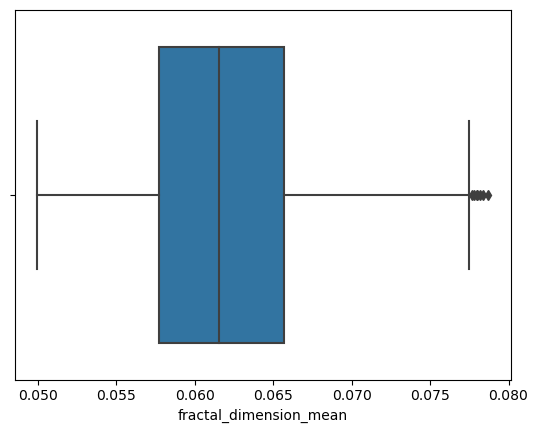

In [113]:
sns.boxplot(data.fractal_dimension_mean)

##### radius_se

In [114]:
IQR=stats.iqr(data.radius_se,interpolation='midpoint')
IQR
Q1=data.radius_se.quantile(0.25)
Q3=data.radius_se.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [115]:
data.loc[data['radius_se']<min_limit]
data.loc[data['radius_se']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.06154,0.14710,0.24190,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.030030,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
12,846226,1,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.23970,0.07800,0.9555,3.5680,11.070,116.20,0.003139,0.08297,0.08890,0.04090,0.044840,0.012840,20.96,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230
25,852631,1,17.14,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,0.06154,0.07413,1.0460,0.9760,7.276,111.40,0.008029,0.03799,0.03732,0.02397,0.023080,0.007444,22.25,21.40,152.40,1461.0,0.15450,0.39490,0.38530,0.25500,0.4066,0.10590
27,852781,1,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.16970,0.05699,0.8529,1.8490,5.632,93.54,0.010750,0.02722,0.05081,0.01911,0.022930,0.004217,21.31,27.26,139.90,1403.0,0.13380,0.21170,0.34460,0.14900,0.2341,0.07421
38,855133,1,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.15650,0.05504,1.2140,2.1880,8.077,106.00,0.006883,0.01094,0.01818,0.01917,0.007882,0.001754,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
42,855625,1,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.23100,0.06343,0.9811,1.6660,8.830,104.90,0.006548,0.10060,0.09723,0.02638,0.053330,0.007646,24.09,33.17,177.40,1651.0,0.12470,0.74440,0.72420,0.24930,0.4670,0.10380
77,8610637,1,18.05,16.15,120.20,1006.0,0.10650,0.21460,0.16840,0.10800,0.21520,0.06673,0.9806,0.5505,6.311,134.80,0.007940,0.05839,0.04658,0.02070,0.025910,0.007054,22.39,18.91,150.10,1610.0,0.14780,0.56340,0.37860,0.21020,0.3751,0.11080
78,8610862,1,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.06154,0.03350,0.06154,0.06154,0.9317,1.8850,8.649,116.40,0.010380,0.06835,0.10910,0.02593,0.078950,0.005987,23.37,31.72,170.30,1623.0,0.16390,0.61640,0.76810,0.25080,0.5440,0.09964
82,8611555,1,13.37,24.91,86.24,551.1,0.10630,0.26650,0.06154,0.03350,0.18290,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.010650,0.005893,30.00,33.62,211.70,2562.0,0.15730,0.60760,0.64760,0.28670,0.2355,0.10510
108,86355,1,13.37,19.67,86.24,551.1,0.13260,0.27680,0.06154,0.03350,0.06154,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.031120,0.005037,28.40,28.01,206.80,2360.0,0.17010,0.69970,0.96080,0.29100,0.4055,0.09789


In [116]:
len(data.loc[data['radius_se']<min_limit])

0

In [117]:
len(data.loc[data['radius_se']>max_limit])

38

In [118]:
38/569*100

6.6783831282952555

In [119]:
# as there are more than 5% outliers we will not handle 

##### texture_se

In [120]:
IQR=stats.iqr(data.texture_se,interpolation='midpoint')
IQR
Q1=data.texture_se.quantile(0.25)
Q3=data.texture_se.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [121]:
data.loc[data['texture_se']<min_limit]
data.loc[data['texture_se']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
12,846226,1,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.23970,0.07800,0.9555,3.568,11.070,116.20,0.003139,0.082970,0.08890,0.040900,0.04484,0.012840,20.960,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230
83,8611792,1,19.100,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.16340,0.07224,0.5190,2.910,5.801,67.10,0.007545,0.060500,0.02134,0.018430,0.03056,0.010390,20.330,32.72,141.30,1298.0,0.13920,0.28170,0.24320,0.18410,0.2311,0.09203
122,865423,1,13.370,20.20,86.24,551.1,0.09592,0.28670,0.06154,0.03350,0.06154,0.06877,1.5090,3.120,9.807,233.00,0.023330,0.098060,0.12780,0.018220,0.04547,0.009875,26.020,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009
136,868223,0,11.710,16.67,74.72,423.6,0.10510,0.06095,0.03592,0.02600,0.13390,0.05945,0.4489,2.508,3.258,34.37,0.006578,0.013800,0.02662,0.013070,0.01359,0.003707,13.330,25.48,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343
152,8710441,0,9.731,18.84,63.78,300.2,0.10720,0.15990,0.06154,0.07857,0.06154,0.06154,0.8245,2.664,4.073,49.85,0.010970,0.095860,0.39600,0.052790,0.03546,0.029840,11.020,19.49,71.04,380.5,0.12920,0.27720,0.82160,0.15710,0.3108,0.12590
192,875099,0,9.720,18.84,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.16530,0.06447,0.3539,4.885,2.230,21.69,0.001713,0.006736,0.00000,0.000000,0.03799,0.001688,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559
245,884437,0,10.480,18.84,66.72,337.7,0.10700,0.05971,0.04831,0.03070,0.17370,0.06440,0.3719,2.612,2.517,23.22,0.016040,0.013860,0.01865,0.011330,0.03476,0.003560,11.480,29.46,73.68,402.8,0.15150,0.10260,0.11810,0.06736,0.2883,0.07748
258,887181,1,15.660,23.20,110.20,773.5,0.11090,0.31140,0.06154,0.13770,0.06154,0.06154,1.2920,2.454,10.120,138.50,0.012360,0.059950,0.08232,0.030240,0.02337,0.006042,19.850,31.64,143.70,1226.0,0.15040,0.51720,0.61810,0.24620,0.3277,0.10190
314,894047,0,8.597,18.84,54.09,221.2,0.10740,0.05847,0.00000,0.00000,0.21630,0.07359,0.3368,2.777,2.222,17.81,0.020750,0.014030,0.00000,0.000000,0.06146,0.006820,8.952,22.44,56.65,240.1,0.13470,0.07767,0.00000,0.00000,0.3142,0.08116
345,898677,0,10.260,18.84,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.16330,0.07005,0.3380,2.509,2.394,19.33,0.017360,0.046710,0.02611,0.012960,0.03675,0.006758,10.880,19.48,70.89,357.1,0.13600,0.16360,0.07162,0.04074,0.2434,0.08488


In [122]:
len(data.loc[data['texture_se']<min_limit])

0

In [123]:
len(data.loc[data['texture_se']>max_limit])

20

In [124]:
20/569*100

3.5149384885764503

In [125]:
# as there are less than 5% outliers we'll handle (in max limit)

In [126]:
data.loc[data['texture_se']>max_limit,'texture_se']=np.median(data.texture_se)

<AxesSubplot:xlabel='texture_se'>

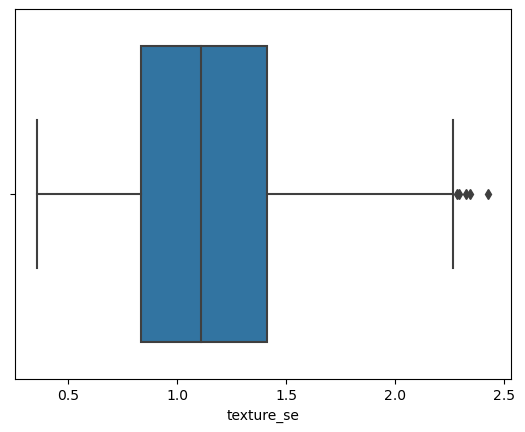

In [127]:
sns.boxplot(data.texture_se)

##### perimeter_se

In [128]:
IQR=stats.iqr(data.perimeter_se,interpolation='midpoint')
IQR
Q1=data.perimeter_se.quantile(0.25)
Q3=data.perimeter_se.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [129]:
data.loc[data['perimeter_se']<min_limit]
data.loc[data['perimeter_se']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.06154,0.14710,0.24190,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.030030,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
12,846226,1,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.23970,0.07800,0.9555,1.1080,11.070,116.20,0.003139,0.08297,0.08890,0.04090,0.044840,0.012840,20.96,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230
25,852631,1,17.14,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,0.06154,0.07413,1.0460,0.9760,7.276,111.40,0.008029,0.03799,0.03732,0.02397,0.023080,0.007444,22.25,21.40,152.40,1461.0,0.15450,0.39490,0.38530,0.25500,0.4066,0.10590
38,855133,1,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.15650,0.05504,1.2140,2.1880,8.077,106.00,0.006883,0.01094,0.01818,0.01917,0.007882,0.001754,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
42,855625,1,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.23100,0.06343,0.9811,1.6660,8.830,104.90,0.006548,0.10060,0.09723,0.02638,0.053330,0.007646,24.09,33.17,177.40,1651.0,0.12470,0.74440,0.72420,0.24930,0.4670,0.10380
77,8610637,1,18.05,16.15,120.20,1006.0,0.10650,0.21460,0.16840,0.10800,0.21520,0.06673,0.9806,0.5505,6.311,134.80,0.007940,0.05839,0.04658,0.02070,0.025910,0.007054,22.39,18.91,150.10,1610.0,0.14780,0.56340,0.37860,0.21020,0.3751,0.11080
78,8610862,1,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.06154,0.03350,0.06154,0.06154,0.9317,1.8850,8.649,116.40,0.010380,0.06835,0.10910,0.02593,0.078950,0.005987,23.37,31.72,170.30,1623.0,0.16390,0.61640,0.76810,0.25080,0.5440,0.09964
82,8611555,1,13.37,24.91,86.24,551.1,0.10630,0.26650,0.06154,0.03350,0.18290,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.010650,0.005893,30.00,33.62,211.70,2562.0,0.15730,0.60760,0.64760,0.28670,0.2355,0.10510
108,86355,1,13.37,19.67,86.24,551.1,0.13260,0.27680,0.06154,0.03350,0.06154,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.031120,0.005037,28.40,28.01,206.80,2360.0,0.17010,0.69970,0.96080,0.29100,0.4055,0.09789
122,865423,1,13.37,20.20,86.24,551.1,0.09592,0.28670,0.06154,0.03350,0.06154,0.06877,1.5090,1.1080,9.807,233.00,0.023330,0.09806,0.12780,0.01822,0.045470,0.009875,26.02,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009


In [130]:
len(data.loc[data['perimeter_se']<min_limit])

0

In [131]:
len(data.loc[data['texture_se']>max_limit])

0

In [132]:
# No outliers

##### area_se

In [133]:
IQR=stats.iqr(data.area_se,interpolation='midpoint')
IQR
Q1=data.area_se.quantile(0.25)
Q3=data.area_se.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [134]:
data.loc[data['area_se']<min_limit]
data.loc[data['area_se']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.2776,0.06154,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.1599,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,84358402,1,20.29,14.34,135.1,1297.0,0.10030,0.1328,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
12,846226,1,19.17,24.80,132.4,1123.0,0.09740,0.2458,0.20650,0.11180,0.2397,0.07800,0.9555,1.1080,11.070,116.20,0.003139,0.08297,0.08890,0.04090,0.04484,0.012840,20.96,29.94,151.7,1332.0,0.1037,0.3903,0.3639,0.1767,0.3176,0.10230
18,849014,1,19.81,22.15,130.0,1260.0,0.09831,0.1027,0.14790,0.09498,0.1582,0.05395,0.7582,1.0170,5.865,112.40,0.006494,0.01893,0.03391,0.01521,0.01356,0.001997,27.32,30.88,186.8,2398.0,0.1512,0.3150,0.5372,0.2388,0.2768,0.07615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,919555,1,20.55,20.86,137.8,1308.0,0.10460,0.1739,0.20850,0.13220,0.2127,0.06251,0.6986,0.9901,4.706,87.78,0.004578,0.02616,0.04005,0.01421,0.01948,0.002689,24.30,25.48,160.2,1809.0,0.1268,0.3135,0.4433,0.2148,0.3077,0.07569
563,926125,1,20.92,25.09,143.0,551.1,0.10990,0.2236,0.06154,0.14740,0.2149,0.06879,0.9622,1.0260,8.758,118.80,0.006399,0.04310,0.07845,0.02624,0.02057,0.006213,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,926424,1,21.56,22.39,142.0,551.1,0.11100,0.1159,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.2,1261.0,0.09780,0.1034,0.14400,0.09791,0.1752,0.05533,0.7655,1.1080,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637


In [135]:
len(data.loc[data['area_se']<min_limit])

0

In [136]:
len(data.loc[data['area_se']>max_limit])

65

In [137]:
65/569*100

11.423550087873462

In [138]:
# as there are more than 5% outliers we will  not handle them 

##### smoothness_se

In [139]:
IQR=stats.iqr(data.smoothness_se,interpolation='midpoint')
IQR
Q1=data.smoothness_se.quantile(0.25)
Q3=data.smoothness_se.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [140]:
data.loc[data['smoothness_se']<min_limit]
data.loc[data['smoothness_se']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
71,859711,0,8.888,18.84,58.79,244.0,0.09783,0.15310,0.086060,0.028720,0.19020,0.06154,0.5262,0.8522,3.168,25.44,0.01721,0.093680,0.056710,0.017660,0.02541,0.021930,9.733,15.67,62.56,284.4,0.1207,0.24360,0.14340,0.04786,0.2254,0.10840
76,8610629,0,13.530,10.94,87.91,559.2,0.12910,0.10470,0.068770,0.065560,0.24030,0.06641,0.4101,1.0140,2.652,32.65,0.01340,0.028390,0.011620,0.008239,0.02572,0.006164,14.080,12.49,91.36,605.5,0.1451,0.13790,0.08539,0.07407,0.2710,0.07191
110,864033,0,9.777,18.84,62.50,290.2,0.10370,0.08404,0.043340,0.017780,0.15840,0.07065,0.4030,1.4240,2.747,22.87,0.01385,0.029320,0.027220,0.010230,0.03281,0.004638,11.050,21.47,71.68,367.0,0.1467,0.17650,0.13000,0.05334,0.2533,0.08468
111,86408,0,12.630,20.76,82.15,480.4,0.09933,0.12090,0.106500,0.060210,0.17350,0.07070,0.3424,1.8030,2.711,20.48,0.01291,0.040420,0.051010,0.022950,0.02144,0.005891,13.330,25.47,89.00,527.4,0.1287,0.22500,0.22160,0.11050,0.2226,0.08486
116,864726,0,8.950,18.84,58.74,245.2,0.09462,0.12430,0.092630,0.023080,0.13050,0.07163,0.3132,0.9789,3.280,16.94,0.01835,0.067600,0.092630,0.023080,0.02384,0.005601,9.414,17.07,63.34,270.0,0.1179,0.18790,0.15440,0.03846,0.1652,0.07722
122,865423,1,13.370,20.20,86.24,551.1,0.09592,0.28670,0.061540,0.033500,0.06154,0.06877,1.5090,1.1080,9.807,233.00,0.02333,0.098060,0.127800,0.018220,0.04547,0.009875,26.020,23.99,180.90,2073.0,0.1696,0.42440,0.58030,0.22480,0.3222,0.08009
173,871641,0,11.080,14.71,70.21,372.7,0.10060,0.05743,0.023630,0.025830,0.15660,0.06669,0.2073,1.8050,1.377,19.08,0.01496,0.021210,0.014530,0.015830,0.03082,0.004785,11.350,16.82,72.01,396.5,0.1216,0.08240,0.03938,0.04306,0.1902,0.07313
176,872608,0,9.904,18.84,64.60,302.4,0.09699,0.12940,0.130700,0.037160,0.16690,0.06154,0.4311,2.2610,3.132,27.48,0.01286,0.088080,0.119700,0.024600,0.03880,0.017920,11.260,24.39,73.07,390.2,0.1301,0.29500,0.34860,0.09910,0.2614,0.11620
185,874158,0,10.080,18.84,63.76,317.5,0.09267,0.04695,0.001597,0.002404,0.17030,0.06048,0.4245,1.2680,2.680,26.43,0.01439,0.012000,0.001597,0.002404,0.02538,0.003470,11.870,21.18,75.39,437.0,0.1521,0.10190,0.00692,0.01042,0.2933,0.07697
196,875938,1,13.770,22.29,90.63,588.9,0.12000,0.12670,0.138500,0.065260,0.18340,0.06877,0.6191,2.1120,4.906,49.70,0.01380,0.033480,0.046650,0.020600,0.02689,0.004306,16.390,34.01,111.60,806.9,0.1737,0.31220,0.38090,0.16730,0.3080,0.09333


In [141]:
len(data.loc[data['smoothness_se']<min_limit])

0

In [142]:
len(data.loc[data['smoothness_se']>max_limit])

30

In [143]:
30/569*100

5.272407732864675

In [144]:
# as there are more than 5% outliers we will  not handle them 

##### compactness_se	

In [145]:
IQR=stats.iqr(data.compactness_se,interpolation='midpoint')
IQR
Q1=data.compactness_se.quantile(0.25)
Q3=data.compactness_se.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [146]:
data.loc[data['compactness_se']<min_limit]
data.loc[data['compactness_se']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,1,11.420,20.38,77.58,386.1,0.09592,0.2839,0.24140,0.10520,0.06154,0.06154,0.4956,1.1560,3.445,27.230,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
9,84501001,1,12.460,24.04,83.97,475.9,0.11860,0.2396,0.22730,0.08543,0.20300,0.06154,0.2976,1.5990,2.039,23.940,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.090,40.68,97.65,711.4,0.18530,1.0580,1.1050,0.22100,0.4366,0.20750
12,846226,1,19.170,24.80,132.40,1123.0,0.09740,0.2458,0.20650,0.11180,0.23970,0.07800,0.9555,1.1080,11.070,116.200,0.003139,0.08297,0.08890,0.04090,0.04484,0.012840,20.960,29.94,151.70,1332.0,0.10370,0.3903,0.3639,0.17670,0.3176,0.10230
42,855625,1,19.070,24.81,128.30,1104.0,0.09081,0.2190,0.21070,0.09961,0.23100,0.06343,0.9811,1.6660,8.830,104.900,0.006548,0.10060,0.09723,0.02638,0.05333,0.007646,24.090,33.17,177.40,1651.0,0.12470,0.7444,0.7242,0.24930,0.4670,0.10380
62,858986,1,14.250,22.15,96.42,645.7,0.10490,0.2008,0.21350,0.08653,0.19490,0.07292,0.7036,1.2680,5.373,60.780,0.009407,0.07056,0.06899,0.01848,0.01700,0.006113,17.670,29.51,119.10,959.5,0.16400,0.6247,0.6922,0.17850,0.2844,0.11320
68,859471,0,9.029,18.84,58.79,250.5,0.10660,0.1413,0.06154,0.04375,0.21110,0.06154,0.3274,1.1940,1.885,17.670,0.009549,0.08606,0.30380,0.03322,0.04197,0.009559,10.310,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.17500,0.4228,0.11750
71,859711,0,8.888,18.84,58.79,244.0,0.09783,0.1531,0.08606,0.02872,0.19020,0.06154,0.5262,0.8522,3.168,25.440,0.017210,0.09368,0.05671,0.01766,0.02541,0.021930,9.733,15.67,62.56,284.4,0.12070,0.2436,0.1434,0.04786,0.2254,0.10840
78,8610862,1,20.180,23.97,143.70,1245.0,0.12860,0.3454,0.06154,0.03350,0.06154,0.06154,0.9317,1.8850,8.649,116.400,0.010380,0.06835,0.10910,0.02593,0.07895,0.005987,23.370,31.72,170.30,1623.0,0.16390,0.6164,0.7681,0.25080,0.5440,0.09964
108,86355,1,13.370,19.67,86.24,551.1,0.13260,0.2768,0.06154,0.03350,0.06154,0.07039,1.2150,1.5450,10.050,170.000,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.400,28.01,206.80,2360.0,0.17010,0.6997,0.9608,0.29100,0.4055,0.09789
112,86409,0,14.260,19.65,97.83,629.9,0.07837,0.2233,0.06154,0.07798,0.17040,0.07769,0.3628,1.4900,3.399,29.250,0.005298,0.07446,0.14350,0.02292,0.02566,0.012980,15.300,23.73,107.00,709.0,0.08949,0.4193,0.6783,0.15050,0.2398,0.10820


In [147]:
len(data.loc[data['compactness_se']<min_limit])

0

In [148]:
len(data.loc[data['compactness_se']>max_limit])

28

In [149]:
28/569*100

4.92091388400703

In [150]:
# as there are less than 5% outliers we'll handle (in max limit)

In [151]:
data.loc[data['compactness_se']>max_limit,'compactness_se']=np.median(data.perimeter_se)

<AxesSubplot:xlabel='compactness_se'>

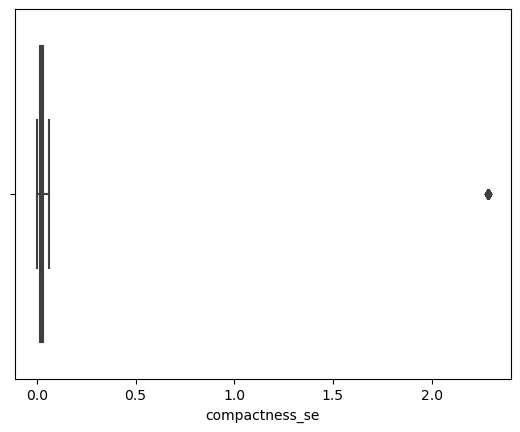

In [152]:
sns.boxplot(data.compactness_se)

##### concavity_se

In [153]:
IQR=stats.iqr(data.concavity_se,interpolation='midpoint')
IQR
Q1=data.concavity_se.quantile(0.25)
Q3=data.concavity_se.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [154]:
data.loc[data['concavity_se']<min_limit]
data.loc[data['concavity_se']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
12,846226,1,19.170,24.80,132.40,1123.0,0.09740,0.2458,0.20650,0.11180,0.23970,0.07800,0.9555,1.1080,11.070,116.200,0.003139,2.28700,0.08890,0.04090,0.04484,0.012840,20.960,29.94,151.70,1332.0,0.10370,0.3903,0.3639,0.17670,0.3176,0.10230
42,855625,1,19.070,24.81,128.30,1104.0,0.09081,0.2190,0.21070,0.09961,0.23100,0.06343,0.9811,1.6660,8.830,104.900,0.006548,2.28700,0.09723,0.02638,0.05333,0.007646,24.090,33.17,177.40,1651.0,0.12470,0.7444,0.7242,0.24930,0.4670,0.10380
68,859471,0,9.029,18.84,58.79,250.5,0.10660,0.1413,0.06154,0.04375,0.21110,0.06154,0.3274,1.1940,1.885,17.670,0.009549,2.28700,0.30380,0.03322,0.04197,0.009559,10.310,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.17500,0.4228,0.11750
78,8610862,1,20.180,23.97,143.70,1245.0,0.12860,0.3454,0.06154,0.03350,0.06154,0.06154,0.9317,1.8850,8.649,116.400,0.010380,2.28700,0.10910,0.02593,0.07895,0.005987,23.370,31.72,170.30,1623.0,0.16390,0.6164,0.7681,0.25080,0.5440,0.09964
108,86355,1,13.370,19.67,86.24,551.1,0.13260,0.2768,0.06154,0.03350,0.06154,0.07039,1.2150,1.5450,10.050,170.000,0.006515,2.28700,0.10400,0.02480,0.03112,0.005037,28.400,28.01,206.80,2360.0,0.17010,0.6997,0.9608,0.29100,0.4055,0.09789
112,86409,0,14.260,19.65,97.83,629.9,0.07837,0.2233,0.06154,0.07798,0.17040,0.07769,0.3628,1.4900,3.399,29.250,0.005298,2.28700,0.14350,0.02292,0.02566,0.012980,15.300,23.73,107.00,709.0,0.08949,0.4193,0.6783,0.15050,0.2398,0.10820
116,864726,0,8.950,18.84,58.74,245.2,0.09462,0.1243,0.09263,0.02308,0.13050,0.07163,0.3132,0.9789,3.280,16.940,0.018350,2.28700,0.09263,0.02308,0.02384,0.005601,9.414,17.07,63.34,270.0,0.11790,0.1879,0.1544,0.03846,0.1652,0.07722
122,865423,1,13.370,20.20,86.24,551.1,0.09592,0.2867,0.06154,0.03350,0.06154,0.06877,1.5090,1.1080,9.807,233.000,0.023330,2.28700,0.12780,0.01822,0.04547,0.009875,26.020,23.99,180.90,2073.0,0.16960,0.4244,0.5803,0.22480,0.3222,0.08009
152,8710441,0,9.731,18.84,63.78,300.2,0.10720,0.1599,0.06154,0.07857,0.06154,0.06154,0.8245,1.1080,4.073,49.850,0.010970,2.28700,0.39600,0.05279,0.03546,0.029840,11.020,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.15710,0.3108,0.12590
176,872608,0,9.904,18.84,64.60,302.4,0.09699,0.1294,0.13070,0.03716,0.16690,0.06154,0.4311,2.2610,3.132,27.480,0.012860,2.28700,0.11970,0.02460,0.03880,0.017920,11.260,24.39,73.07,390.2,0.13010,0.2950,0.3486,0.09910,0.2614,0.11620


In [155]:
len(data.loc[data['concavity_se']<min_limit])

0

In [156]:
len(data.loc[data['concavity_se']>max_limit])

22

In [157]:
22/569*100

3.8664323374340945

In [158]:
# as there are less than 5% outliers we'll handle (in max limit)

In [159]:
data.loc[data['concavity_se']>max_limit,'concavity_se']=np.median(data.concavity_se)

<AxesSubplot:xlabel='concavity_se'>

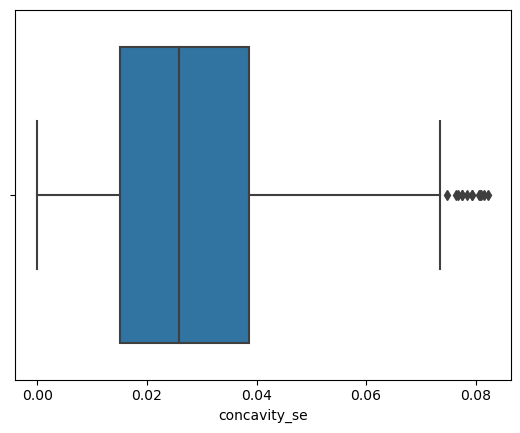

In [160]:
sns.boxplot(data.concavity_se)

##### concave points_se

In [161]:
IQR=stats.iqr(data['concave points_se'],interpolation='midpoint')
IQR
Q1=data['concave points_se'].quantile(0.25)
Q3=data['concave points_se'].quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [162]:
data.loc[data['concave points_se']<min_limit]
data.loc[data['concave points_se']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
12,846226,1,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.23970,0.07800,0.9555,1.1080,11.070,116.200,0.003139,2.28700,0.02589,0.04090,0.04484,0.012840,20.96,29.94,151.70,1332.0,0.10370,0.3903,0.3639,0.17670,0.3176,0.10230
42,855625,1,19.070,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.23100,0.06343,0.9811,1.6660,8.830,104.900,0.006548,2.28700,0.02589,0.02638,0.05333,0.007646,24.09,33.17,177.40,1651.0,0.12470,0.7444,0.7242,0.24930,0.4670,0.10380
68,859471,0,9.029,18.84,58.79,250.5,0.10660,0.14130,0.06154,0.04375,0.21110,0.06154,0.3274,1.1940,1.885,17.670,0.009549,2.28700,0.02589,0.03322,0.04197,0.009559,10.31,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.17500,0.4228,0.11750
78,8610862,1,20.180,23.97,143.70,1245.0,0.12860,0.34540,0.06154,0.03350,0.06154,0.06154,0.9317,1.8850,8.649,116.400,0.010380,2.28700,0.02589,0.02593,0.07895,0.005987,23.37,31.72,170.30,1623.0,0.16390,0.6164,0.7681,0.25080,0.5440,0.09964
138,868826,1,14.950,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,0.19570,0.06216,1.2960,1.4520,8.419,101.900,0.010000,0.03480,0.06577,0.02801,0.05168,0.002887,18.55,21.43,121.40,971.4,0.14110,0.2164,0.3355,0.16670,0.3414,0.07147
152,8710441,0,9.731,18.84,63.78,300.2,0.10720,0.15990,0.06154,0.07857,0.06154,0.06154,0.8245,1.1080,4.073,49.850,0.010970,2.28700,0.02589,0.05279,0.03546,0.029840,11.02,19.49,71.04,380.5,0.12920,0.2772,0.8216,0.15710,0.3108,0.12590
161,8711803,1,19.190,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.17410,0.05176,1.0000,0.6336,6.971,119.300,0.009406,0.03055,0.04344,0.02794,0.03156,0.003362,22.03,17.81,146.60,1495.0,0.11240,0.2016,0.2264,0.17770,0.2443,0.06251
210,881046502,1,20.580,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.17650,0.05024,0.8601,1.4800,7.029,111.700,0.008124,0.03611,0.05489,0.02765,0.03176,0.002365,23.24,27.84,158.30,1656.0,0.11780,0.2920,0.3861,0.19200,0.2909,0.05865
213,881094802,1,17.420,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.13080,0.05866,0.5296,1.6670,3.767,58.530,0.031130,2.28700,0.02589,0.03927,0.02175,0.012560,18.07,28.07,120.40,1021.0,0.12430,0.1793,0.2803,0.10990,0.1603,0.06818
258,887181,1,15.660,23.20,110.20,773.5,0.11090,0.31140,0.06154,0.13770,0.06154,0.06154,1.2920,1.1080,10.120,138.500,0.012360,0.05995,0.08232,0.03024,0.02337,0.006042,19.85,31.64,143.70,1226.0,0.15040,0.5172,0.6181,0.24620,0.3277,0.10190


In [163]:
len(data.loc[data['concave points_se']<min_limit])

0

In [164]:
len(data.loc[data['concave points_se']>max_limit])

19

In [165]:
# as there are less than 5% outliers we'll handle (in max limit)

In [166]:
19/569*100

3.3391915641476277

In [167]:
data.loc[data['concave points_se']>max_limit,'concave points_se']=np.median(data['concave points_se'])

<AxesSubplot:xlabel='concave points_se'>

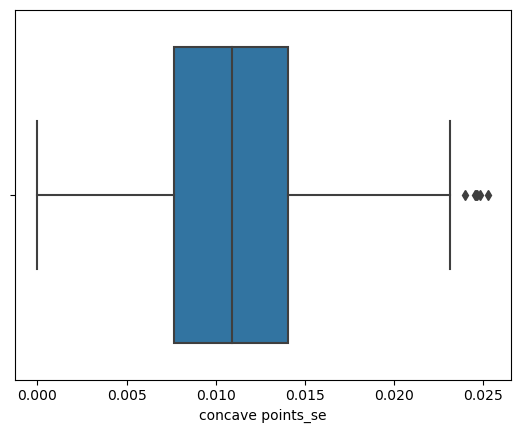

In [168]:
sns.boxplot(data['concave points_se'])

##### symmetry_se

In [169]:
IQR=stats.iqr(data.symmetry_se,interpolation='midpoint')
IQR
Q1=data.symmetry_se.quantile(0.25)
Q3=data.symmetry_se.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [170]:
data.loc[data['symmetry_se']<min_limit]
data.loc[data['symmetry_se']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,1,11.420,20.38,77.58,386.1,0.09592,0.28390,0.241400,0.105200,0.06154,0.06154,0.4956,1.1560,3.445,27.23,0.009110,2.287000,0.056610,0.018670,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
12,846226,1,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.206500,0.111800,0.23970,0.07800,0.9555,1.1080,11.070,116.20,0.003139,2.287000,0.025890,0.010930,0.04484,0.012840,20.960,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230
22,8511133,1,15.340,14.26,102.50,704.4,0.10730,0.21350,0.207700,0.097560,0.06154,0.07032,0.4388,0.7096,3.384,44.91,0.006789,0.053280,0.064460,0.022520,0.03672,0.004394,18.070,19.08,125.10,980.9,0.13900,0.59540,0.63050,0.23930,0.4667,0.09946
42,855625,1,19.070,24.81,128.30,1104.0,0.09081,0.21900,0.210700,0.099610,0.23100,0.06343,0.9811,1.6660,8.830,104.90,0.006548,2.287000,0.025890,0.010930,0.05333,0.007646,24.090,33.17,177.40,1651.0,0.12470,0.74440,0.72420,0.24930,0.4670,0.10380
60,858970,0,10.170,18.84,64.55,311.9,0.11340,0.08061,0.010840,0.012900,0.06154,0.06960,0.5158,1.4410,3.312,34.62,0.007514,0.010990,0.007665,0.008193,0.04183,0.005953,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
63,859196,0,9.173,18.84,59.20,260.9,0.07721,0.08751,0.059880,0.021800,0.23410,0.06963,0.4098,2.2650,2.608,23.52,0.008738,0.039380,0.043120,0.015600,0.04192,0.005822,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
68,859471,0,9.029,18.84,58.79,250.5,0.10660,0.14130,0.061540,0.043750,0.21110,0.06154,0.3274,1.1940,1.885,17.67,0.009549,2.287000,0.025890,0.010930,0.04197,0.009559,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
78,8610862,1,20.180,23.97,143.70,1245.0,0.12860,0.34540,0.061540,0.033500,0.06154,0.06154,0.9317,1.8850,8.649,116.40,0.010380,2.287000,0.025890,0.010930,0.07895,0.005987,23.370,31.72,170.30,1623.0,0.16390,0.61640,0.76810,0.25080,0.5440,0.09964
119,865128,1,17.950,20.01,114.20,982.0,0.08402,0.06722,0.072930,0.055960,0.21290,0.05025,0.5506,1.2140,3.357,54.04,0.004024,0.008422,0.022910,0.009863,0.05014,0.001902,20.580,27.83,129.20,1261.0,0.10720,0.12020,0.22490,0.11850,0.4882,0.06111
122,865423,1,13.370,20.20,86.24,551.1,0.09592,0.28670,0.061540,0.033500,0.06154,0.06877,1.5090,1.1080,9.807,233.00,0.023330,2.287000,0.025890,0.018220,0.04547,0.009875,26.020,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009


In [171]:
len(data.loc[data['symmetry_se']<min_limit])

0

In [172]:
len(data.loc[data['symmetry_se']>max_limit])

27

In [173]:
27/569*100

4.745166959578207

In [174]:
# as there are less than 5% outliers we'll handle (in max limit)

In [175]:
data.loc[data['symmetry_se']>max_limit,'symmetry_se']=np.median(data.symmetry_se)

<AxesSubplot:xlabel='symmetry_se'>

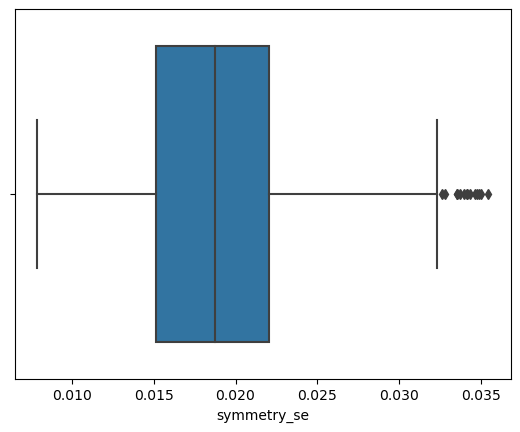

In [176]:
sns.boxplot(data.symmetry_se)

##### fractal_dimension_se

In [177]:
IQR=stats.iqr(data.fractal_dimension_se,interpolation='midpoint')
IQR
Q1=data.fractal_dimension_se.quantile(0.25)
Q3=data.fractal_dimension_se.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [178]:
data.loc[data['fractal_dimension_se']<min_limit]
data.loc[data['fractal_dimension_se']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,1,11.420,20.38,77.58,386.1,0.09592,0.2839,0.24140,0.10520,0.06154,0.06154,0.4956,1.1560,3.445,27.230,0.009110,2.28700,0.05661,0.01867,0.01873,0.009208,14.910,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
9,84501001,1,12.460,24.04,83.97,475.9,0.11860,0.2396,0.22730,0.08543,0.20300,0.06154,0.2976,1.5990,2.039,23.940,0.007149,2.28700,0.07743,0.01432,0.01789,0.010080,15.090,40.68,97.65,711.4,0.18530,1.0580,1.1050,0.22100,0.4366,0.20750
12,846226,1,19.170,24.80,132.40,1123.0,0.09740,0.2458,0.20650,0.11180,0.23970,0.07800,0.9555,1.1080,11.070,116.200,0.003139,2.28700,0.02589,0.01093,0.01873,0.012840,20.960,29.94,151.70,1332.0,0.10370,0.3903,0.3639,0.17670,0.3176,0.10230
14,84667401,1,13.730,22.61,93.60,578.3,0.11310,0.2293,0.21280,0.08025,0.20690,0.07682,0.2121,1.1690,2.061,19.210,0.006429,0.05936,0.05501,0.01628,0.01961,0.008093,15.030,32.01,108.80,697.7,0.16510,0.7725,0.6943,0.22080,0.3596,0.14310
68,859471,0,9.029,18.84,58.79,250.5,0.10660,0.1413,0.06154,0.04375,0.21110,0.06154,0.3274,1.1940,1.885,17.670,0.009549,2.28700,0.02589,0.01093,0.01873,0.009559,10.310,22.65,65.50,324.7,0.14820,0.4365,1.2520,0.17500,0.4228,0.11750
71,859711,0,8.888,18.84,58.79,244.0,0.09783,0.1531,0.08606,0.02872,0.19020,0.06154,0.5262,0.8522,3.168,25.440,0.017210,2.28700,0.05671,0.01766,0.02541,0.021930,9.733,15.67,62.56,284.4,0.12070,0.2436,0.1434,0.04786,0.2254,0.10840
83,8611792,1,19.100,26.29,129.10,1132.0,0.12150,0.1791,0.19370,0.14690,0.16340,0.07224,0.5190,1.1080,5.801,67.100,0.007545,0.06050,0.02134,0.01843,0.03056,0.010390,20.330,32.72,141.30,1298.0,0.13920,0.2817,0.2432,0.18410,0.2311,0.09203
112,86409,0,14.260,19.65,97.83,629.9,0.07837,0.2233,0.06154,0.07798,0.17040,0.07769,0.3628,1.4900,3.399,29.250,0.005298,2.28700,0.02589,0.02292,0.02566,0.012980,15.300,23.73,107.00,709.0,0.08949,0.4193,0.6783,0.15050,0.2398,0.10820
122,865423,1,13.370,20.20,86.24,551.1,0.09592,0.2867,0.06154,0.03350,0.06154,0.06877,1.5090,1.1080,9.807,233.000,0.023330,2.28700,0.02589,0.01822,0.01873,0.009875,26.020,23.99,180.90,2073.0,0.16960,0.4244,0.5803,0.22480,0.3222,0.08009
145,869476,0,11.900,14.65,78.11,432.8,0.11520,0.1296,0.03710,0.03003,0.19950,0.07839,0.3962,0.6538,3.021,25.030,0.010170,0.04741,0.02789,0.01110,0.03127,0.009423,13.150,16.51,86.26,509.6,0.14240,0.2517,0.0942,0.06042,0.2727,0.10360


In [179]:
len(data.loc[data['fractal_dimension_se']<min_limit])

0

In [180]:
len(data.loc[data['fractal_dimension_se']>max_limit])

28

In [181]:
28/569*100

4.92091388400703

In [182]:
# as there are less than 5% outliers we'll handle (in max limit)

In [183]:
data.loc[data['fractal_dimension_se']>max_limit,'fractal_dimension_se']=np.median(data.fractal_dimension_se)

<AxesSubplot:xlabel='fractal_dimension_se'>

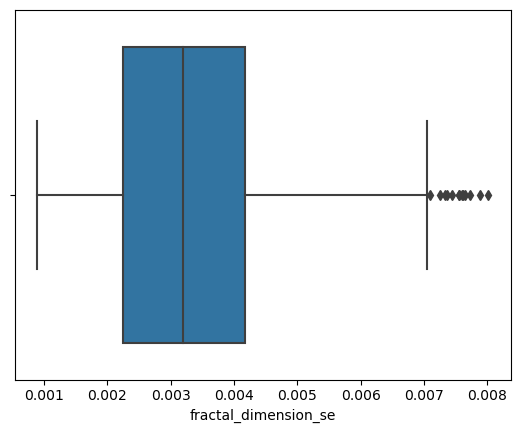

In [184]:
sns.boxplot(data.fractal_dimension_se)

##### radius_worst

In [185]:
IQR=stats.iqr(data.radius_worst,interpolation='midpoint')
IQR
Q1=data.radius_worst.quantile(0.25)
Q3=data.radius_worst.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [186]:
data.loc[data['radius_worst']<min_limit]
data.loc[data['radius_worst']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
23,851509,1,21.16,23.04,137.20,551.1,0.09428,0.10220,0.10970,0.08632,0.17690,0.05278,0.6917,1.1270,4.303,93.99,0.004728,0.01259,0.01715,0.01038,0.01083,0.001987,29.17,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526
82,8611555,1,13.37,24.91,86.24,551.1,0.10630,0.26650,0.06154,0.03350,0.18290,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.01065,0.005893,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,1,13.37,19.67,86.24,551.1,0.13260,0.27680,0.06154,0.03350,0.06154,0.07039,1.2150,1.5450,10.050,170.00,0.006515,2.28700,0.02589,0.02480,0.03112,0.005037,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
164,8712289,1,13.37,22.04,86.24,551.1,0.08439,0.11450,0.13240,0.09702,0.18010,0.05553,0.6642,0.8561,4.603,97.85,0.004910,0.02544,0.02822,0.01623,0.01956,0.003740,28.01,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
180,873592,1,13.37,21.87,86.24,551.1,0.10940,0.19140,0.06154,0.03350,0.18000,0.05770,0.8361,1.4810,5.820,128.70,0.004631,0.02537,0.03109,0.01241,0.01575,0.002747,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
212,8810703,1,13.37,18.47,86.24,551.1,0.11420,0.15160,0.06154,0.03350,0.16480,0.05525,2.8730,1.4760,21.980,525.60,0.013450,0.02772,0.06389,0.01407,0.01873,0.004476,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
219,88119002,1,19.53,32.47,128.00,1223.0,0.08420,0.11300,0.11450,0.06637,0.14280,0.05313,0.7392,1.3210,4.722,109.90,0.005539,0.02644,0.02664,0.01078,0.01332,0.002256,27.90,45.41,180.2,2477.0,0.1408,0.4097,0.3995,0.1625,0.2713,0.07568
236,88299702,1,13.37,26.97,86.24,551.1,0.09509,0.16820,0.19500,0.12370,0.19090,0.06309,1.0580,0.9635,7.247,155.80,0.006428,0.02863,0.04497,0.01716,0.01590,0.003053,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
265,88995002,1,20.73,31.12,135.70,551.1,0.09469,0.11430,0.13670,0.08646,0.17690,0.05674,1.1720,1.6170,7.749,199.70,0.004551,0.01478,0.02143,0.00928,0.01367,0.002299,32.49,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218
272,8910988,1,21.75,20.99,147.30,551.1,0.09401,0.19610,0.21950,0.10880,0.17210,0.06194,1.1670,1.3520,8.867,156.80,0.005687,0.04960,0.06329,0.01561,0.01924,0.004614,28.19,28.18,195.9,2384.0,0.1272,0.4725,0.5807,0.1841,0.2833,0.08858


In [187]:
len(data.loc[data['radius_worst']<min_limit])

0

In [188]:
len(data.loc[data['radius_worst']>max_limit])

17

In [189]:
17/569*100

2.987697715289982

In [190]:
# as there are less than 5% outliers we'll handle (in max limit)

In [191]:
data.loc[data['radius_worst']>max_limit,'radius_worst']=np.median(data.radius_worst)

<AxesSubplot:xlabel='radius_worst'>

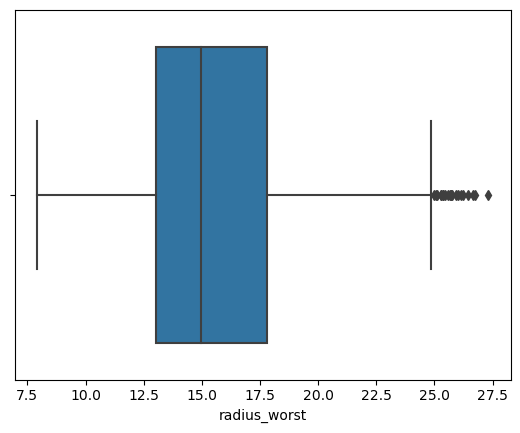

In [192]:
sns.boxplot(data.radius_worst)

##### texture_worst

In [193]:
IQR=stats.iqr(data.texture_worst,interpolation='midpoint')
IQR
Q1=data.texture_worst.quantile(0.25)
Q3=data.texture_worst.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [194]:
data.loc[data['texture_worst']<min_limit]
data.loc[data['texture_worst']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
219,88119002,1,19.53,32.47,128.0,1223.0,0.08420,0.1130,0.1145,0.06637,0.1428,0.05313,0.7392,1.3210,4.722,109.90,0.005539,0.02644,0.02664,0.01078,0.013320,0.002256,14.97,45.41,180.2,2477.0,0.1408,0.4097,0.3995,0.1625,0.2713,0.07568
239,88330202,1,17.46,39.28,113.4,920.6,0.09812,0.1298,0.1417,0.08811,0.1809,0.05966,0.5366,0.8561,3.002,49.00,0.004860,0.02785,0.02602,0.01374,0.012260,0.002759,22.51,44.87,141.2,1408.0,0.1365,0.3735,0.3241,0.2066,0.2853,0.08496
259,88725602,1,15.53,33.56,103.7,744.9,0.10630,0.1639,0.1751,0.08399,0.2091,0.06650,0.2419,1.2780,1.903,23.02,0.005345,0.02556,0.02889,0.01022,0.009947,0.003359,18.49,49.54,126.3,1035.0,0.1883,0.5564,0.5703,0.2014,0.3512,0.12040
265,88995002,1,20.73,31.12,135.7,551.1,0.09469,0.1143,0.1367,0.08646,0.1769,0.05674,1.1720,1.6170,7.749,199.70,0.004551,0.01478,0.02143,0.00928,0.013670,0.002299,14.97,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218
562,925622,1,15.22,30.62,103.4,716.9,0.10480,0.2087,0.2550,0.09429,0.2128,0.07152,0.2602,1.2050,2.362,22.65,0.004625,0.04844,0.07359,0.01608,0.021370,0.006142,17.52,42.79,128.7,915.0,0.1417,0.7917,1.1700,0.2356,0.4089,0.14090


In [195]:
len(data.loc[data['texture_worst']<min_limit])

0

In [196]:
len(data.loc[data['texture_worst']>max_limit])

5

In [197]:
5/569*100

0.8787346221441126

In [198]:
# as there are less than 5% outliers we'll handle (in max limit)

In [199]:
data.loc[data['texture_worst']>max_limit,'texture_worst']=np.median(data.texture_worst)

<AxesSubplot:xlabel='texture_worst'>

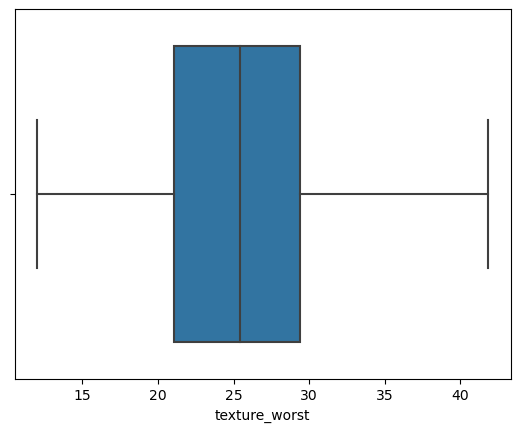

In [200]:
sns.boxplot(data.texture_worst)

##### perimeter_worst

In [201]:
IQR=stats.iqr(data.perimeter_worst,interpolation='midpoint')
IQR
Q1=data.perimeter_worst.quantile(0.25)
Q3=data.perimeter_worst.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [202]:
data.loc[data['perimeter_worst']<min_limit]
data.loc[data['perimeter_worst']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
23,851509,1,21.16,23.04,137.20,551.1,0.09428,0.10220,0.10970,0.08632,0.17690,0.05278,0.6917,1.1270,4.303,93.99,0.004728,0.01259,0.01715,0.01038,0.01083,0.001987,14.97,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526
82,8611555,1,13.37,24.91,86.24,551.1,0.10630,0.26650,0.06154,0.03350,0.18290,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.01065,0.005893,14.97,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,1,13.37,19.67,86.24,551.1,0.13260,0.27680,0.06154,0.03350,0.06154,0.07039,1.2150,1.5450,10.050,170.00,0.006515,2.28700,0.02589,0.02480,0.03112,0.005037,14.97,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
180,873592,1,13.37,21.87,86.24,551.1,0.10940,0.19140,0.06154,0.03350,0.18000,0.05770,0.8361,1.4810,5.820,128.70,0.004631,0.02537,0.03109,0.01241,0.01575,0.002747,14.97,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
212,8810703,1,13.37,18.47,86.24,551.1,0.11420,0.15160,0.06154,0.03350,0.16480,0.05525,2.8730,1.4760,21.980,525.60,0.013450,0.02772,0.06389,0.01407,0.01873,0.004476,14.97,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
236,88299702,1,13.37,26.97,86.24,551.1,0.09509,0.16820,0.19500,0.12370,0.19090,0.06309,1.0580,0.9635,7.247,155.80,0.006428,0.02863,0.04497,0.01716,0.01590,0.003053,14.97,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
265,88995002,1,20.73,31.12,135.70,551.1,0.09469,0.11430,0.13670,0.08646,0.17690,0.05674,1.1720,1.6170,7.749,199.70,0.004551,0.01478,0.02143,0.00928,0.01367,0.002299,14.97,25.41,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218
272,8910988,1,21.75,20.99,147.30,551.1,0.09401,0.19610,0.21950,0.10880,0.17210,0.06194,1.1670,1.3520,8.867,156.80,0.005687,0.04960,0.06329,0.01561,0.01924,0.004614,14.97,28.18,195.9,2384.0,0.1272,0.4725,0.5807,0.1841,0.2833,0.08858
339,89812,1,13.37,24.27,86.24,551.1,0.10690,0.12830,0.23080,0.14100,0.17970,0.05506,1.0090,0.9245,6.462,164.10,0.006292,0.01971,0.03582,0.01301,0.01479,0.003118,14.97,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738
352,899987,1,13.37,17.46,86.24,551.1,0.11490,0.23630,0.06154,0.03350,0.19560,0.06121,0.9948,0.8509,7.222,153.10,0.006369,0.04243,0.04266,0.01508,0.02335,0.003385,14.97,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815


In [203]:
len(data.loc[data['perimeter_worst']<min_limit])

0

In [204]:
len(data.loc[data['perimeter_worst']>max_limit])

15

In [205]:
15/569*100

2.6362038664323375

In [206]:
# as there are less than 5% outliers we'll handle (in max limit)

In [207]:
data.loc[data['perimeter_worst']>max_limit,'perimeter_worst']=np.median(data.perimeter_worst)

<AxesSubplot:xlabel='perimeter_worst'>

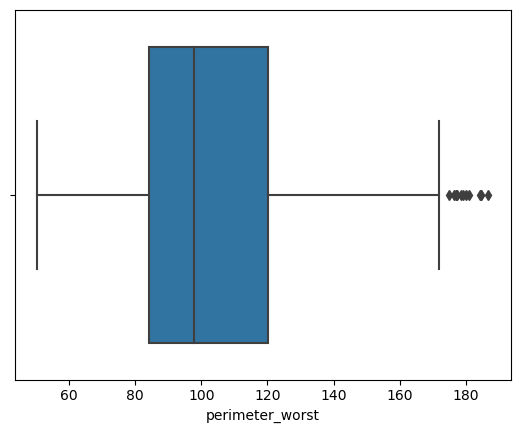

In [208]:
sns.boxplot(data.perimeter_worst)

##### area_worst

In [209]:
IQR=stats.iqr(data.area_worst,interpolation='midpoint')
IQR
Q1=data.area_worst.quantile(0.25)
Q3=data.area_worst.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [210]:
data.loc[data['area_worst']<min_limit]
data.loc[data['area_worst']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.06154,0.14710,0.24190,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.18120,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
18,849014,1,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.15820,0.05395,0.7582,1.0170,5.865,112.40,0.006494,0.01893,0.03391,0.01521,0.01356,0.001997,27.32,30.88,186.80,2398.0,0.1512,0.3150,0.5372,0.2388,0.2768,0.07615
23,851509,1,21.16,23.04,137.20,551.1,0.09428,0.10220,0.10970,0.08632,0.17690,0.05278,0.6917,1.1270,4.303,93.99,0.004728,0.01259,0.01715,0.01038,0.01083,0.001987,14.97,35.59,97.66,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526
24,852552,1,16.65,21.38,110.00,904.6,0.11210,0.14570,0.15250,0.09170,0.19950,0.06330,0.8068,0.9017,5.455,102.60,0.006048,0.01882,0.02741,0.01130,0.01468,0.002801,26.46,31.56,177.00,2215.0,0.1805,0.3578,0.4695,0.2095,0.3613,0.09564
56,857637,1,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.19170,0.05961,0.7275,1.1930,4.837,102.50,0.006458,0.02306,0.02945,0.01538,0.01852,0.002608,26.14,28.14,170.10,2145.0,0.1624,0.3511,0.3879,0.2091,0.3537,0.08294
82,8611555,1,13.37,24.91,86.24,551.1,0.10630,0.26650,0.06154,0.03350,0.18290,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.01065,0.005893,14.97,33.62,97.66,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,1,13.37,19.67,86.24,551.1,0.13260,0.27680,0.06154,0.03350,0.06154,0.07039,1.2150,1.5450,10.050,170.00,0.006515,2.28700,0.02589,0.02480,0.03112,0.005037,14.97,28.01,97.66,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,1,13.37,20.20,86.24,551.1,0.09592,0.28670,0.06154,0.03350,0.06154,0.06877,1.5090,1.1080,9.807,233.00,0.023330,2.28700,0.02589,0.01822,0.01873,0.003187,26.02,23.99,180.90,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
162,871201,1,19.59,18.15,130.70,1214.0,0.11200,0.16660,0.25080,0.12860,0.20270,0.06082,0.7364,1.0480,4.792,97.07,0.004057,0.02277,0.04029,0.01303,0.01686,0.003318,26.73,26.39,174.90,2232.0,0.1438,0.3846,0.6810,0.2247,0.3643,0.09223


In [211]:
len(data.loc[data['area_worst']<min_limit])

0

In [212]:
len(data.loc[data['area_worst']>max_limit])

35

In [213]:
35/569*100

6.151142355008787

In [214]:
# as there are more than 5% outliers wewill not handle them

##### smoothness_worst

In [215]:
IQR=stats.iqr(data.smoothness_worst,interpolation='midpoint')
IQR
Q1=data.smoothness_worst.quantile(0.25)
Q3=data.smoothness_worst.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [216]:
data.loc[data['smoothness_worst']<min_limit]
data.loc[data['smoothness_worst']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,1,11.420,20.38,77.58,386.1,0.09592,0.2839,0.2414,0.10520,0.06154,0.06154,0.4956,1.156,3.445,27.23,0.009110,2.28700,0.05661,0.01867,0.01873,0.003187,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
41,855563,1,10.950,21.35,71.90,371.1,0.12270,0.1218,0.1044,0.05669,0.18950,0.06870,0.2366,1.428,1.822,16.97,0.008064,0.01764,0.02595,0.01037,0.01357,0.003040,12.84,35.34,87.22,514.0,0.1909,0.2698,0.4023,0.1424,0.2964,0.09606
203,87880,1,13.810,23.75,91.56,597.8,0.13230,0.1768,0.1558,0.09176,0.22510,0.07421,0.5648,1.930,3.909,52.72,0.008824,0.03108,0.03112,0.01291,0.01998,0.004506,19.20,41.85,128.50,1153.0,0.2226,0.5209,0.4646,0.2013,0.4432,0.10860
379,9013838,1,11.080,18.83,73.30,361.6,0.12160,0.2154,0.1689,0.06367,0.21960,0.06154,0.2114,1.027,1.719,13.99,0.007405,0.04549,0.04588,0.01339,0.01738,0.004435,13.24,32.82,91.76,508.1,0.2184,0.9379,0.8402,0.2524,0.4154,0.14030
504,915186,0,9.268,18.84,61.49,248.7,0.09592,0.2239,0.0973,0.05252,0.23780,0.06154,0.4076,1.093,3.014,20.04,0.009783,0.04542,0.03483,0.02188,0.02542,0.003187,10.28,16.38,69.05,300.2,0.1902,0.3441,0.2099,0.1025,0.3038,0.12520
505,915276,0,9.676,18.84,64.12,272.5,0.12550,0.2204,0.1188,0.07038,0.20570,0.06154,0.2744,1.390,1.787,17.67,0.021770,0.04888,0.05189,0.01450,0.02632,0.003187,10.60,18.04,69.47,328.1,0.2006,0.3663,0.2913,0.1075,0.2848,0.13640


In [217]:
len(data.loc[data['smoothness_worst']<min_limit])

1

In [218]:
len(data.loc[data['smoothness_worst']>max_limit])

6

In [219]:
6/569*100

1.054481546572935

In [220]:
# as there are less than 5% outliers we'll handle (in max limit)

In [221]:
data.loc[data['smoothness_worst']<min_limit,'smoothness_worst']=np.median(data.smoothness_worst)

In [222]:
data.loc[data['smoothness_worst']>max_limit,'smoothness_worst']=np.median(data.smoothness_worst)

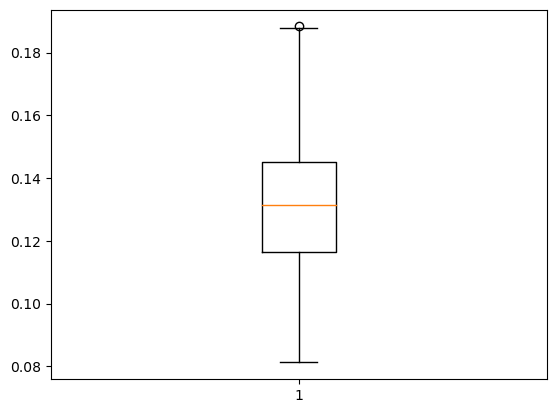

In [223]:
#Create a box plot to check outliers
fig, ax = plt.subplots()
ax.boxplot(data['smoothness_worst'])
plt.show()

##### compactness_worst

In [224]:
IQR=stats.iqr(data.compactness_worst,interpolation='midpoint')
IQR
Q1=data.compactness_worst.quantile(0.25)
Q3=data.compactness_worst.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [225]:
data.loc[data['compactness_worst']<min_limit]
data.loc[data['compactness_worst']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.06154,0.14710,0.24190,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
3,84348301,1,11.42,20.38,77.58,386.1,0.09592,0.2839,0.24140,0.10520,0.06154,0.06154,0.4956,1.1560,3.445,27.23,0.009110,2.28700,0.05661,0.018670,0.01873,0.003187,14.91,26.50,98.87,567.7,0.1313,0.8663,0.6869,0.2575,0.6638,0.17300
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.2396,0.22730,0.08543,0.20300,0.06154,0.2976,1.5990,2.039,23.94,0.007149,2.28700,0.07743,0.014320,0.01789,0.003187,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750
14,84667401,1,13.73,22.61,93.60,578.3,0.11310,0.2293,0.21280,0.08025,0.20690,0.07682,0.2121,1.1690,2.061,19.21,0.006429,0.05936,0.05501,0.016280,0.01961,0.003187,15.03,32.01,108.80,697.7,0.1651,0.7725,0.6943,0.2208,0.3596,0.14310
15,84799002,1,14.54,27.54,96.73,658.8,0.11390,0.1595,0.16390,0.07364,0.23030,0.07077,0.3700,1.0330,2.879,32.55,0.005607,0.04240,0.04741,0.010900,0.01857,0.005466,17.46,37.13,124.10,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410
26,852763,1,14.58,21.53,97.41,644.8,0.10540,0.1868,0.14250,0.08783,0.22520,0.06924,0.2545,0.9832,2.110,21.05,0.004452,0.03055,0.02681,0.013520,0.01454,0.003711,17.62,33.21,122.40,896.9,0.1525,0.6643,0.5539,0.2701,0.4264,0.12750
33,854002,1,19.27,26.47,127.90,1162.0,0.09401,0.1719,0.16570,0.07593,0.18530,0.06261,0.5558,0.6062,3.528,68.17,0.005015,0.03318,0.03497,0.009643,0.01543,0.003896,24.15,30.90,161.40,1813.0,0.1509,0.6590,0.6091,0.1785,0.3672,0.11230
42,855625,1,19.07,24.81,128.30,1104.0,0.09081,0.2190,0.21070,0.09961,0.23100,0.06343,0.9811,1.6660,8.830,104.90,0.006548,2.28700,0.02589,0.010930,0.01873,0.007646,24.09,33.17,177.40,1651.0,0.1247,0.7444,0.7242,0.2493,0.4670,0.10380
72,859717,1,17.20,24.52,114.20,929.4,0.10710,0.1830,0.16920,0.07944,0.19270,0.06487,0.5907,1.0410,3.705,69.47,0.005820,0.05616,0.04252,0.011270,0.01527,0.006299,23.32,33.82,151.60,1681.0,0.1585,0.7394,0.6566,0.1899,0.3313,0.13390
108,86355,1,13.37,19.67,86.24,551.1,0.13260,0.2768,0.06154,0.03350,0.06154,0.07039,1.2150,1.5450,10.050,170.00,0.006515,2.28700,0.02589,0.024800,0.03112,0.005037,14.97,28.01,97.66,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789


In [226]:
len(data.loc[data['compactness_worst']<min_limit])

0

In [227]:
len(data.loc[data['compactness_worst']>max_limit])

16

In [228]:
16/569*100

2.8119507908611596

In [229]:
# as there are less than 5% outliers we'll handle (in max limit)

In [230]:
data.loc[data['compactness_worst']>max_limit,'compactness_worst']=np.median(data.compactness_worst)

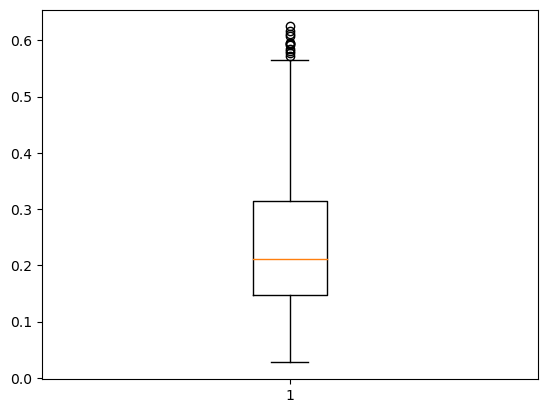

In [231]:
#Create a box plot to check outliers
fig, ax = plt.subplots()
ax.boxplot(data['compactness_worst'])
plt.show()

##### concavity_worst

In [232]:
IQR=stats.iqr(data.concavity_worst,interpolation='midpoint')
IQR
Q1=data.concavity_worst.quantile(0.25)
Q3=data.concavity_worst.quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [233]:
data.loc[data['concavity_worst']<min_limit]
data.loc[data['concavity_worst']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
9,84501001,1,12.460,24.04,83.97,475.9,0.11860,0.2396,0.22730,0.08543,0.20300,0.06154,0.2976,1.5990,2.039,23.94,0.007149,2.28700,0.07743,0.01432,0.01789,0.003187,15.09,40.68,97.65,711.4,0.1853,0.2119,1.1050,0.2210,0.4366,0.20750
68,859471,0,9.029,18.84,58.79,250.5,0.10660,0.1413,0.06154,0.04375,0.21110,0.06154,0.3274,1.1940,1.885,17.67,0.009549,2.28700,0.02589,0.01093,0.01873,0.003187,10.31,22.65,65.50,324.7,0.1482,0.4365,1.2520,0.1750,0.4228,0.11750
108,86355,1,13.370,19.67,86.24,551.1,0.13260,0.2768,0.06154,0.03350,0.06154,0.07039,1.2150,1.5450,10.050,170.00,0.006515,2.28700,0.02589,0.02480,0.03112,0.005037,14.97,28.01,97.66,2360.0,0.1701,0.2119,0.9608,0.2910,0.4055,0.09789
152,8710441,0,9.731,18.84,63.78,300.2,0.10720,0.1599,0.06154,0.07857,0.06154,0.06154,0.8245,1.1080,4.073,49.85,0.010970,2.28700,0.02589,0.01093,0.03546,0.003187,11.02,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.1571,0.3108,0.12590
190,874858,1,14.220,23.12,94.37,609.9,0.10750,0.2413,0.19810,0.06618,0.23840,0.07542,0.2860,2.1100,2.112,31.72,0.007970,2.28700,0.02589,0.01666,0.01873,0.003187,15.74,37.18,106.40,762.4,0.1533,0.2119,0.8488,0.1772,0.5166,0.14460
202,878796,1,13.370,26.67,86.24,551.1,0.11410,0.2084,0.06154,0.03350,0.22000,0.06229,0.5539,1.5600,4.667,83.16,0.009327,0.05121,0.02589,0.02465,0.02175,0.005195,25.12,32.68,177.00,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762
252,885429,1,19.730,19.82,130.70,1206.0,0.10620,0.1849,0.24170,0.09740,0.17330,0.06697,0.7661,0.7800,4.115,92.81,0.008482,0.05057,0.06800,0.01971,0.01467,0.007259,25.28,25.59,159.80,1933.0,0.1710,0.5955,0.8489,0.2507,0.2749,0.12970
379,9013838,1,11.080,18.83,73.30,361.6,0.12160,0.2154,0.16890,0.06367,0.21960,0.06154,0.2114,1.0270,1.719,13.99,0.007405,0.04549,0.04588,0.01339,0.01738,0.004435,13.24,32.82,91.76,508.1,0.1313,0.2119,0.8402,0.2524,0.4154,0.14030
400,90439701,1,17.910,21.02,124.40,994.0,0.12300,0.2576,0.06154,0.11980,0.21130,0.07115,0.4030,0.7747,3.123,41.51,0.007159,0.03718,0.06165,0.01051,0.01591,0.005099,20.80,27.78,149.60,1304.0,0.1873,0.5917,0.9034,0.1964,0.3245,0.11980
430,907914,1,14.900,22.53,102.10,685.0,0.09947,0.2225,0.27330,0.09711,0.20410,0.06898,0.2530,0.8749,3.466,24.19,0.006965,2.28700,0.07926,0.02234,0.01499,0.005784,16.35,27.57,125.40,832.7,0.1419,0.2119,0.9019,0.2475,0.2866,0.11550


In [234]:
len(data.loc[data['concavity_worst']<min_limit])

0

In [235]:
len(data.loc[data['concavity_worst']>max_limit])

12

In [236]:
12/569*100

2.10896309314587

In [237]:
# as there are less than 5% outliers we'll handle (in max limit)

In [238]:
data.loc[data['concavity_worst']>max_limit,'concavity_worst']=np.median(data.concavity_worst)

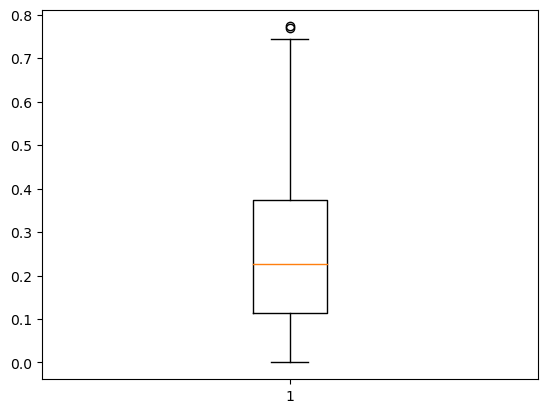

In [239]:
#Create a box plot to check outliers
fig, ax = plt.subplots()
ax.boxplot(data['concavity_worst'])
plt.show()

##### concave points_worst

In [240]:
IQR=stats.iqr(data['concave points_worst'],interpolation='midpoint')
IQR
Q1=data['concave points_worst'].quantile(0.25)
Q3=data['concave points_worst'].quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [241]:
data.loc[data['concave points_worst']<min_limit]
data.loc[data['concave points_worst']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [242]:
len(data.loc[data['concave points_worst']<min_limit])

0

In [243]:
len(data.loc[data['concave points_worst']>max_limit])

0

In [244]:
# No outliers

##### symmetry_worst	

In [245]:
IQR=stats.iqr(data.symmetry_worst,interpolation='midpoint')
IQR
Q1=data['symmetry_worst'].quantile(0.25)
Q3=data['symmetry_worst'].quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [246]:
data.loc[data['symmetry_worst']<min_limit]
data.loc[data['symmetry_worst']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.06154,0.14710,0.24190,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.2119,0.7119,0.26540,0.4601,0.11890
3,84348301,1,11.420,20.38,77.58,386.1,0.09592,0.28390,0.24140,0.10520,0.06154,0.06154,0.4956,1.1560,3.445,27.23,0.009110,2.287000,0.05661,0.018670,0.01873,0.003187,14.91,26.50,98.87,567.7,0.1313,0.2119,0.6869,0.25750,0.6638,0.17300
8,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.23500,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.20300,0.06154,0.2976,1.5990,2.039,23.94,0.007149,2.287000,0.07743,0.014320,0.01789,0.003187,15.09,40.68,97.65,711.4,0.1853,0.2119,0.2267,0.22100,0.4366,0.20750
15,84799002,1,14.540,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.23030,0.07077,0.3700,1.0330,2.879,32.55,0.005607,0.042400,0.04741,0.010900,0.01857,0.005466,17.46,37.13,124.10,943.2,0.1678,0.2119,0.7026,0.17120,0.4218,0.13410
22,8511133,1,15.340,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.09756,0.06154,0.07032,0.4388,0.7096,3.384,44.91,0.006789,0.053280,0.06446,0.022520,0.01873,0.004394,18.07,19.08,125.10,980.9,0.1390,0.5954,0.6305,0.23930,0.4667,0.09946
26,852763,1,14.580,21.53,97.41,644.8,0.10540,0.18680,0.14250,0.08783,0.22520,0.06924,0.2545,0.9832,2.110,21.05,0.004452,0.030550,0.02681,0.013520,0.01454,0.003711,17.62,33.21,122.40,896.9,0.1525,0.2119,0.5539,0.27010,0.4264,0.12750
31,853612,1,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,0.23010,0.07799,0.4825,1.0300,3.475,41.00,0.005551,0.034140,0.04205,0.010440,0.02273,0.005667,16.82,28.12,119.40,888.7,0.1637,0.5775,0.6956,0.15460,0.4761,0.14020
34,854039,1,16.130,17.88,107.00,807.2,0.10400,0.15590,0.13540,0.07752,0.19980,0.06515,0.3340,0.6857,2.183,35.03,0.004185,0.028680,0.02664,0.009067,0.01703,0.003817,20.21,27.26,132.70,1261.0,0.1446,0.5804,0.5274,0.18640,0.4270,0.12330
35,854253,1,16.740,21.59,110.10,869.5,0.09610,0.13360,0.13480,0.06018,0.18960,0.05656,0.4615,0.9197,3.008,45.19,0.005776,0.024990,0.03695,0.011950,0.02789,0.002665,20.01,29.02,133.50,1229.0,0.1563,0.3835,0.5409,0.18130,0.4863,0.08633


In [247]:
len(data.loc[data['symmetry_worst']<min_limit])

0

In [248]:
len(data.loc[data['symmetry_worst']>max_limit])

23

In [249]:
23/569*100

4.042179261862917

In [250]:
data.loc[data['symmetry_worst']>max_limit,'symmetry_worst']=np.median(data['symmetry_worst'])

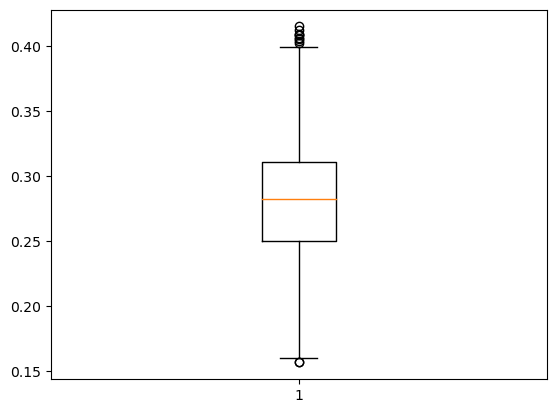

In [251]:
#Create a box plot to check outliers
fig, ax = plt.subplots()
ax.boxplot(data['symmetry_worst'])
plt.show()

##### fractal_dimension_worst

In [252]:
IQR=stats.iqr(data.fractal_dimension_worst,interpolation='midpoint')
IQR
Q1=data['fractal_dimension_worst'].quantile(0.25)
Q3=data['fractal_dimension_worst'].quantile(0.75)

min_limit= Q1-1.5*IQR
max_limit= Q3+1.5*IQR

In [253]:
data.loc[data['fractal_dimension_worst']<min_limit]
data.loc[data['fractal_dimension_worst']>max_limit]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,84348301,1,11.420,20.38,77.58,386.1,0.09592,0.2839,0.24140,0.10520,0.06154,0.06154,0.4956,1.1560,3.445,27.23,0.009110,2.28700,0.05661,0.018670,0.01873,0.003187,14.910,26.50,98.87,567.7,0.1313,0.2119,0.6869,0.25750,0.2822,0.1730
5,843786,1,12.450,15.70,82.57,477.1,0.12780,0.1700,0.15780,0.08089,0.20870,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.011370,0.02165,0.005082,15.470,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.1244
9,84501001,1,12.460,24.04,83.97,475.9,0.11860,0.2396,0.22730,0.08543,0.20300,0.06154,0.2976,1.5990,2.039,23.94,0.007149,2.28700,0.07743,0.014320,0.01789,0.003187,15.090,40.68,97.65,711.4,0.1853,0.2119,0.2267,0.22100,0.2822,0.2075
14,84667401,1,13.730,22.61,93.60,578.3,0.11310,0.2293,0.21280,0.08025,0.20690,0.07682,0.2121,1.1690,2.061,19.21,0.006429,0.05936,0.05501,0.016280,0.01961,0.003187,15.030,32.01,108.80,697.7,0.1651,0.2119,0.6943,0.22080,0.3596,0.1431
15,84799002,1,14.540,27.54,96.73,658.8,0.11390,0.1595,0.16390,0.07364,0.23030,0.07077,0.3700,1.0330,2.879,32.55,0.005607,0.04240,0.04741,0.010900,0.01857,0.005466,17.460,37.13,124.10,943.2,0.1678,0.2119,0.7026,0.17120,0.2822,0.1341
26,852763,1,14.580,21.53,97.41,644.8,0.10540,0.1868,0.14250,0.08783,0.22520,0.06924,0.2545,0.9832,2.110,21.05,0.004452,0.03055,0.02681,0.013520,0.01454,0.003711,17.620,33.21,122.40,896.9,0.1525,0.2119,0.5539,0.27010,0.2822,0.1275
31,853612,1,11.840,18.70,77.93,440.6,0.11090,0.1516,0.12180,0.05182,0.23010,0.07799,0.4825,1.0300,3.475,41.00,0.005551,0.03414,0.04205,0.010440,0.02273,0.005667,16.820,28.12,119.40,888.7,0.1637,0.5775,0.6956,0.15460,0.2822,0.1402
34,854039,1,16.130,17.88,107.00,807.2,0.10400,0.1559,0.13540,0.07752,0.19980,0.06515,0.3340,0.6857,2.183,35.03,0.004185,0.02868,0.02664,0.009067,0.01703,0.003817,20.210,27.26,132.70,1261.0,0.1446,0.5804,0.5274,0.18640,0.2822,0.1233
72,859717,1,17.200,24.52,114.20,929.4,0.10710,0.1830,0.16920,0.07944,0.19270,0.06487,0.5907,1.0410,3.705,69.47,0.005820,0.05616,0.04252,0.011270,0.01527,0.006299,23.320,33.82,151.60,1681.0,0.1585,0.2119,0.6566,0.18990,0.3313,0.1339
105,863030,1,13.110,15.56,87.21,530.2,0.09592,0.1765,0.20710,0.09601,0.19250,0.07692,0.3908,0.9238,2.410,34.66,0.007162,0.02912,0.05473,0.013880,0.01547,0.007098,16.310,22.40,106.40,827.2,0.1862,0.4099,0.6376,0.19860,0.3147,0.1405


In [254]:
len(data.loc[data['fractal_dimension_worst']<min_limit])

0

In [255]:
len(data.loc[data['fractal_dimension_worst']>max_limit])

24

In [256]:
24/569*100

4.21792618629174

In [257]:
data.loc[data['fractal_dimension_worst']>max_limit,'fractal_dimension_worst']=np.median(data['fractal_dimension_worst'])

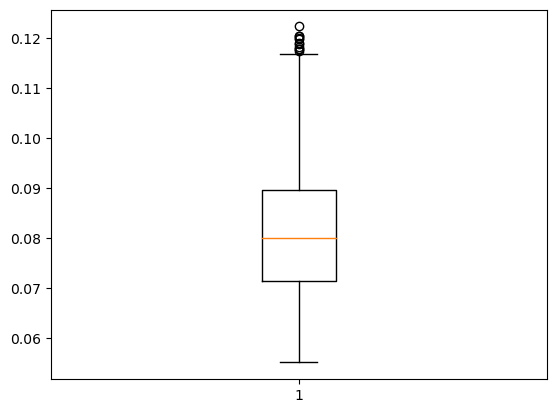

In [258]:
#Create a box plot to check outliers
fig, ax = plt.subplots()
ax.boxplot(data['fractal_dimension_worst'])
plt.show()

### Drop

In [259]:
data.drop(columns=['id'],inplace=True)
#unquie

In [4]:
## Saving the preprocessed data.
data.to_csv('Preprocessed_data.csv')

In [5]:
## Loading the data
df1=pd.read_csv('Preprocessed_data.csv')

# Model Creation 

In [6]:
df1.drop(['Unnamed: 0','diagnosis'], axis=1, inplace=True)


In [7]:
df1.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
# Since it is an unsupervised learning, we need only the input variables
X=df1.copy()
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
from sklearn.cluster import KMeans
#creating cluster
model = KMeans(n_clusters=5, random_state=10)

#Training the model
model.fit(X)

KMeans(n_clusters=5, random_state=10)

In [10]:
model.labels_

array([2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 4, 4, 3, 2,
       3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 3, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 2, 3, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [11]:
# centroids of the clusters
model.cluster_centers_

array([[8.85031002e+07, 1.47069429e+01, 2.07371429e+01, 9.61041429e+01,
        7.03518571e+02, 9.79085714e-02, 1.13894857e-01, 9.85661429e-02,
        5.58226143e-02, 1.84704286e-01, 6.27901429e-02, 4.27402857e-01,
        1.09640143e+00, 2.98061571e+00, 4.44838429e+01, 6.35254286e-03,
        2.55627857e-02, 3.01913571e-02, 1.15491286e-02, 1.89842429e-02,
        3.78386857e-03, 1.73022000e+01, 2.74778571e+01, 1.14260143e+02,
        9.89528571e+02, 1.35830571e-01, 2.92638571e-01, 3.06140714e-01,
        1.29091000e-01, 3.01162857e-01, 8.72867143e-02],
       [9.08351330e+08, 1.60494286e+01, 2.09871429e+01, 1.04800000e+02,
        9.33771429e+02, 9.13171429e-02, 9.02642857e-02, 1.04564857e-01,
        5.92412857e-02, 1.63028571e-01, 5.87385714e-02, 7.69042857e-01,
        1.06704286e+00, 5.33971429e+00, 1.18264286e+02, 6.73628571e-03,
        2.03278571e-02, 2.86175571e-02, 1.16231429e-02, 1.71042857e-02,
        2.77014286e-03, 1.97271429e+01, 2.74057143e+01, 1.30270000e+02,
       

In [12]:
X['Group']= pd.DataFrame(model.labels_)
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Group
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,2
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,2
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,2
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,2
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,2
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,2


In [13]:
### Determine K using elbow method

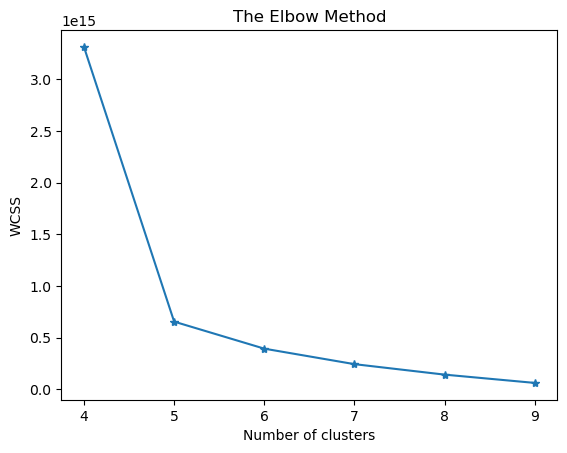

In [14]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]                 #i=no. of cluster
for i in range (4,10):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(4,10),wcss,marker='*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
### Evaluation Metrics:

In [15]:
label=model.labels_
label

from sklearn.metrics import silhouette_score
score=silhouette_score(X,label)
score #K=4

0.973462727167743

In [16]:
X.Group.unique()

array([2, 0, 3, 4, 1])

In [ ]:
Different Groups

In [17]:
Group0=X.loc[X['Group']==0]
Group0

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Group
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,0
7,84458202,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0
9,84501001,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,91813702,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,...,19.27,87.22,564.9,0.1292,0.2074,0.1791,0.10700,0.3110,0.07592,0
531,91903901,11.67,20.02,75.21,416.2,0.10160,0.09453,0.04200,0.02157,0.1859,...,28.81,87.00,550.6,0.1550,0.2964,0.2758,0.08120,0.3206,0.08950,0
532,91903902,13.68,16.33,87.76,575.5,0.09277,0.07255,0.01752,0.01880,0.1631,...,20.20,101.60,773.4,0.1264,0.1564,0.1206,0.08704,0.2806,0.07782,0
533,91930402,20.47,20.67,134.70,1299.0,0.09156,0.13130,0.15230,0.10150,0.2166,...,27.15,152.00,1645.0,0.1097,0.2534,0.3092,0.16130,0.3220,0.06386,0


In [18]:
Group1=X.loc[X['Group']==1]
Group1

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Group
359,901034301,9.436,18.32,59.82,278.6,0.10090,0.05956,0.027100,0.014060,0.1506,...,25.02,75.79,439.6,0.13330,0.10490,0.114400,0.05052,0.2454,0.08136,1
360,901034302,12.540,18.07,79.42,491.9,0.07436,0.02650,0.001194,0.005449,0.1528,...,20.98,86.82,585.7,0.09293,0.04327,0.003581,0.01635,0.2233,0.05521,1
449,911157302,21.100,20.52,138.10,1384.0,0.09684,0.11750,0.157200,0.115500,0.1554,...,32.07,168.20,2022.0,0.13680,0.31010,0.439900,0.22800,0.2268,0.07425,1
460,911296201,17.080,27.15,111.20,930.9,0.09898,0.11100,0.100700,0.064310,0.1793,...,34.49,152.10,1648.0,0.16000,0.24440,0.263900,0.15550,0.3010,0.09060,1
461,911296202,27.420,26.27,186.90,2501.0,0.10840,0.19880,0.363500,0.168900,0.2061,...,31.37,251.20,4254.0,0.13570,0.42560,0.683300,0.26250,0.2641,0.07427,1
463,911320501,11.600,18.36,73.88,412.7,0.08508,0.05855,0.033670,0.017770,0.1516,...,24.02,82.68,495.1,0.13420,0.18080,0.186000,0.08288,0.3210,0.07863,1
464,911320502,13.170,18.22,84.28,537.3,0.07466,0.05994,0.048590,0.028700,0.1454,...,23.89,95.10,687.6,0.12820,0.19650,0.187600,0.10450,0.2235,0.06925,1


In [19]:
Group2=X.loc[X['Group']==2]
Group2

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Group
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,2
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,2
5,843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440,2
6,844359,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368,2
8,844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.17030,0.54010,0.5390,0.2060,0.4378,0.10720,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,2
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,2
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,2
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,2


In [20]:
Group3=X.loc[X['Group']==3]
Group3

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Group
19,8510426,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,3
20,8510653,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,3
21,8510824,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,3
22,8511133,15.340,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.097560,0.2521,...,19.08,125.10,980.9,0.13900,0.59540,0.63050,0.23930,0.4667,0.09946,3
74,8610175,12.310,16.52,79.19,470.9,0.09172,0.06829,0.03372,0.022720,0.1720,...,23.21,89.71,611.1,0.11760,0.18430,0.17030,0.08660,0.2618,0.07609,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,9113514,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,...,24.62,71.11,380.2,0.13880,0.12550,0.06409,0.02500,0.3057,0.07875,3
468,9113538,17.600,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.100200,0.1696,...,28.87,143.60,1437.0,0.12070,0.47850,0.51650,0.19960,0.2301,0.12240,3
470,9113778,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.015140,0.2238,...,25.62,70.88,385.2,0.12340,0.15420,0.12770,0.06560,0.3174,0.08524,3
471,9113816,12.040,28.14,76.85,449.9,0.08752,0.06000,0.02367,0.023770,0.1854,...,33.33,87.24,567.6,0.10410,0.09726,0.05524,0.05547,0.2404,0.06639,3


In [21]:
Group4=X.loc[X['Group']==4]
Group4

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Group
150,871001501,13.000,20.78,83.51,519.4,0.11350,0.07589,0.03136,0.02645,0.2540,...,24.11,90.82,616.7,0.1297,0.1105,0.08112,0.06296,0.3196,0.06435,4
151,871001502,8.219,20.70,53.27,203.9,0.09405,0.13050,0.13210,0.02168,0.2222,...,29.72,58.08,249.8,0.1630,0.4310,0.53810,0.07879,0.3322,0.14860,4
210,881046502,20.580,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,...,27.84,158.30,1656.0,0.1178,0.2920,0.38610,0.19200,0.2909,0.05865,4
213,881094802,17.420,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,...,28.07,120.40,1021.0,0.1243,0.1793,0.28030,0.10990,0.1603,0.06818,4


In [25]:
print('Group0 shape',Group0.shape[0])
print('Group1 shape',Group1.shape[0])
print('Group2 shape',Group2.shape[0])
print('Group3 shape',Group3.shape[0])
print('Group4 shape',Group4.shape[0])

Group0 shape 70
Group1 shape 7
Group2 shape 385
Group3 shape 103
Group4 shape 4


### 70 values are assign to group 0

### 7 values are assign to group 1

### 385 values are assign to group 2

### 103 values are assign to group 3

### 4 values are assign to group 4

#### Group 2 has more (385) number of observation than other group.
#### Group 4 has the lowest (4)  number of observation than other

# Conclusion



#### Kmean model is performing pertty good with a silhouette score of 0.97

#### The score is between +1 to Near +1 Silhouette score indicates that the sample is far away from its neighboring cluster

#### Sensitive to outliers

### Goal of Clustering

- Distance between centroid and its point should be minimum
- Intra-cluster distance should be less
- Distance between intercluster should be high